In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data PreProcessing and Cleaning

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv("kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

1. date needs to be converted to datetime format.
2. bathrooms are in float type, where .5 accounts for a room with a toilet but no shower.

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [5]:
df.tail()

id       date     price  bedrooms  bathrooms  sqft_living  \
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
21608      1131     3.0           0     0          3      8        1530   
21609      5813     2.0           0     0          3      8        2310   
21610      1350     2.0           0     0          3      7        1020   
21611      2388     2.0           0     0          3      8        1600   
21612      1076     2.0           0     0          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357

In [6]:
df['date'].min()

Timestamp('2014-05-02 00:00:00')

In [7]:
df['date'].max()

Timestamp('2015-05-27 00:00:00')

1. The data was collected between 2014 may to 2015 may.

# EDA

## Price v/s Time Analysis

### Over the Year

In [10]:
grouped_year = df.groupby(df['date'].dt.year)['price'].describe()
grouped_year

count           mean            std      min       25%       50%  \
date                                                                       
2014  14633.0  539181.428415  369162.693855  78000.0  320000.0  450000.0   
2015   6980.0  541988.992264  362841.814006  75000.0  324950.0  450500.0   

           75%        max  
date                       
2014  645000.0  7700000.0  
2015  643237.5  5350000.0

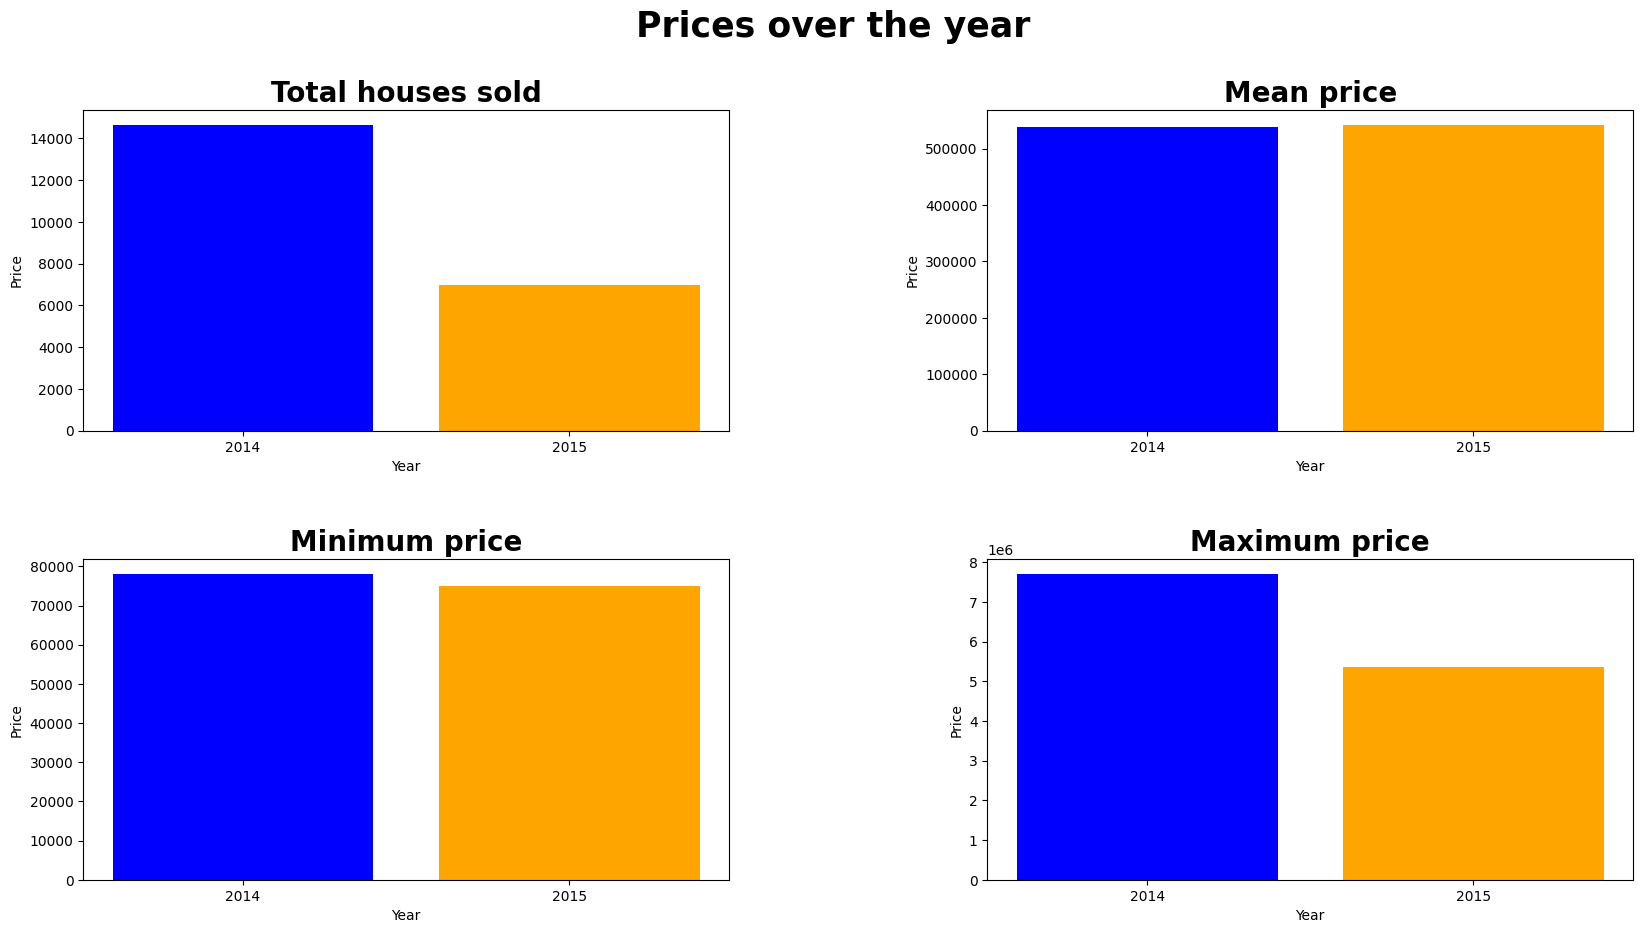

In [11]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.suptitle("Prices over the year", fontsize = 25, fontweight = 'bold')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

colors = ['blue', 'orange']
labels = ['Total houses sold', 'Mean price', 'Minimum price', 'Maximum price']
columns = ['count', 'mean', 'min', 'max']

for i, ax in enumerate(axs.flat):
    column = columns[i]
    ax.bar(grouped_year.index, grouped_year[column], color=colors)
    ax.set_title(labels[i], fontsize=20, fontweight='bold')
    ax.set_xlabel("Year")
    ax.set_ylabel("Price")
    ax.set_xticks(grouped_year.index)
    ax.set_xticklabels(grouped_year.index)

plt.show()

1. It looks like prices of the house in 2015 increased when compared to 2014.
2. 25% of the houses are have prices less than 32000.
3. 50% of the houses are have prices less than 45000.
4. 75% of the houses are have prices less than 64500.

### Over the Month

In [12]:
grouped_year = df.groupby([df['date'].dt.year.rename('year'), df['date'].dt.month.rename('month')])['price'].describe()
grouped_year

count           mean            std       min        25%  \
year month                                                              
2014 5      1768.0  548080.276584  356502.789521   78000.0  325975.00   
     6      2180.0  558002.199541  388260.134140   92000.0  330000.00   
     7      2211.0  544788.764360  346731.122314   86500.0  325000.00   
     8      1940.0  536445.276804  370583.428226  107000.0  324560.25   
     9      1774.0  529253.821871  372531.666484   85000.0  325000.00   
     10     1878.0  539026.971778  399243.064472   89000.0  315000.00   
     11     1411.0  521961.009213  355710.228751   82000.0  308562.50   
     12     1471.0  524461.866757  353292.716182   95000.0  312250.00   
2015 1       978.0  525870.889571  366053.601187   99000.0  310162.50   
     2      1250.0  507851.371200  325998.284607   75000.0  309000.00   
     3      1875.0  543977.187200  355051.196554   81000.0  319925.00   
     4      2231.0  561837.774989  369928.879358   84000.0  338450.00   
     5       646.0  558126.811146  414821.964244   95000.0  342125.00   

                 50%       75%        max  
year month                                 
2014 5      465000.0  650910.0  3710000.0  
     6      465000.0  665000.0  7062500.0  
     7      465000.0  653875.0  3800000.0  
     8      442100.0  640000.0  5570000.0  
     9      450000.0  624375.0  6885000.0  
     10     446900.0  640000.0  7700000.0  
     11     435000.0  616000.0  3850000.0  
     12     432500.0  626550.0  3300000.0  
2015 1      438500.0  625000.0  3567000.0  
     2      425545.0  600000.0  3065000.0  
     3      450000.0  655000.0  3395000.0  
     4      476500.0  668250.0  5350000.0  
     5      455000.0  625000.0  4208000.0

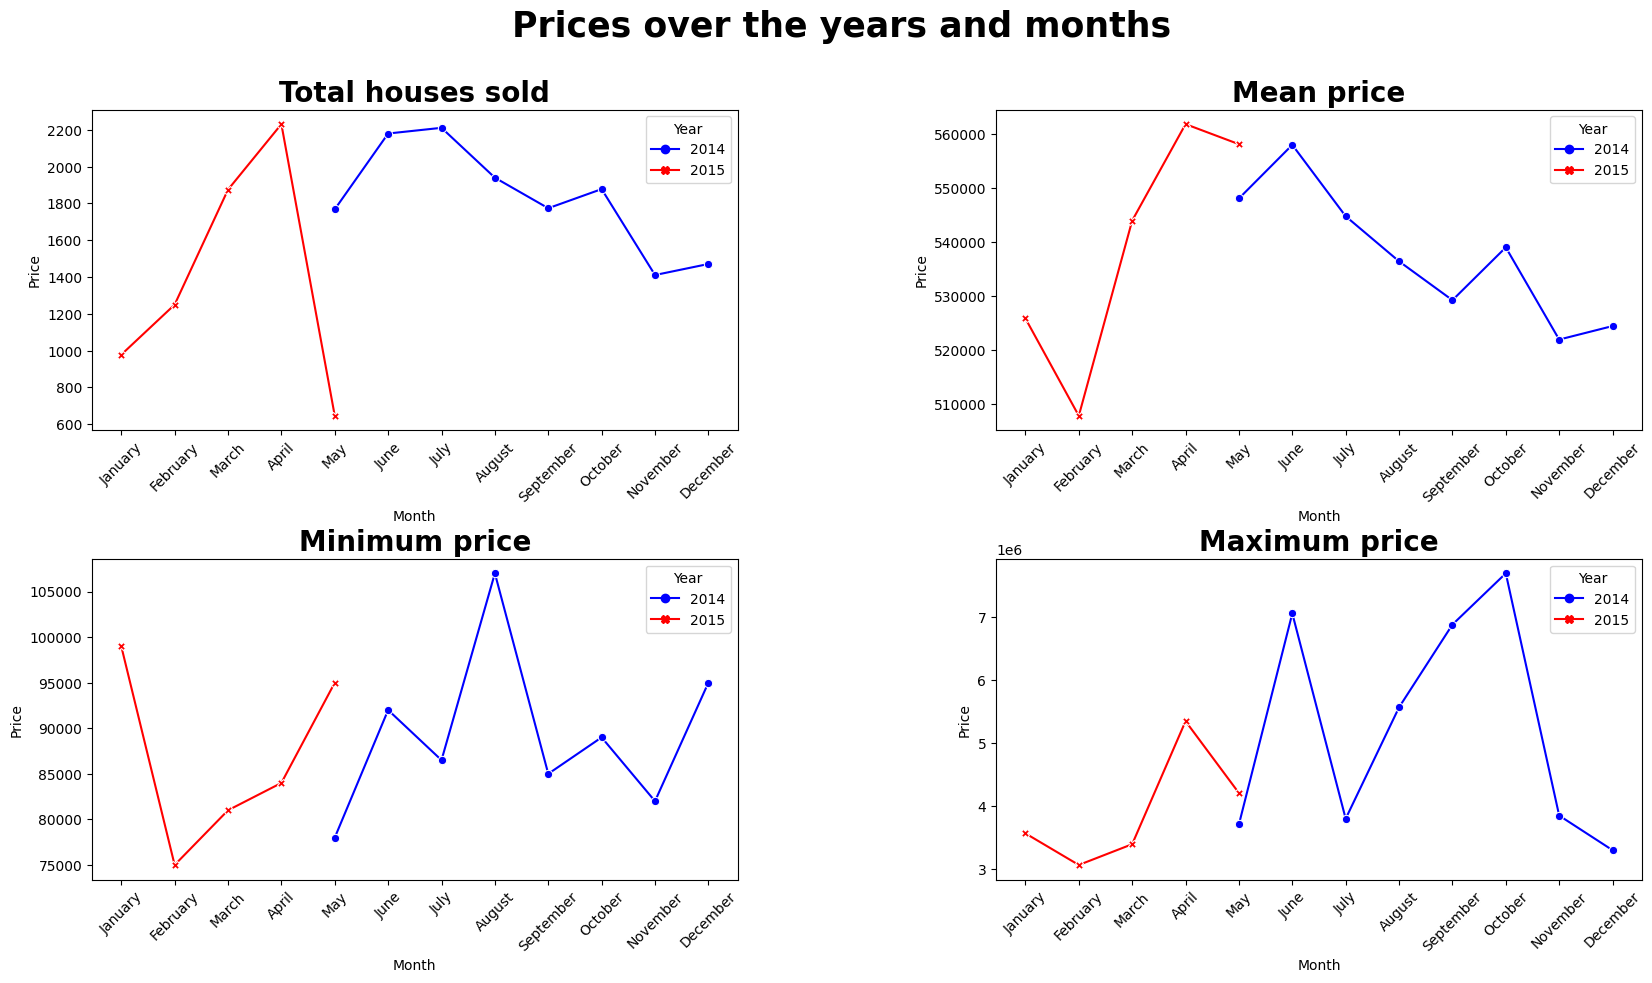

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.suptitle("Prices over the years and months", fontsize = 25, fontweight = 'bold')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
labels = ['Total houses sold', 'Mean price', 'Minimum price', 'Maximum price']
columns = ['count', 'mean', 'min', 'max']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

for i, ax in enumerate(axs.flat):
    sns.lineplot(data=grouped_year, x=grouped_year.index.get_level_values('month'), y=columns[i], hue=grouped_year.index.get_level_values('year'),style=grouped_year.index.get_level_values('year'),
    markers=True, dashes=False, palette = ['blue', 'red'], ax = ax)
    ax.set_title(labels[i], fontsize=20, fontweight='bold')
    ax.set_xlabel("Month")
    ax.set_ylabel("Price")
    ax.set_xticks(range(1, len(months)+1))
    ax.set_xticklabels(months)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Year')

plt.show()

In [14]:
grouped_month = df.groupby(df['date'].dt.month)['price'].describe()
grouped_month

count           mean            std       min        25%       50%  \
date                                                                        
1      978.0  525870.889571  366053.601187   99000.0  310162.50  438500.0   
2     1250.0  507851.371200  325998.284607   75000.0  309000.00  425545.0   
3     1875.0  543977.187200  355051.196554   81000.0  319925.00  450000.0   
4     2231.0  561837.774989  369928.879358   84000.0  338450.00  476500.0   
5     2414.0  550768.785833  372941.571515   78000.0  330000.00  462000.0   
6     2180.0  558002.199541  388260.134140   92000.0  330000.00  465000.0   
7     2211.0  544788.764360  346731.122314   86500.0  325000.00  465000.0   
8     1940.0  536445.276804  370583.428226  107000.0  324560.25  442100.0   
9     1774.0  529253.821871  372531.666484   85000.0  325000.00  450000.0   
10    1878.0  539026.971778  399243.064472   89000.0  315000.00  446900.0   
11    1411.0  521961.009213  355710.228751   82000.0  308562.50  435000.0   
12    1471.0  524461.866757  353292.716182   95000.0  312250.00  432500.0   

           75%        max  
date                       
1     625000.0  3567000.0  
2     600000.0  3065000.0  
3     655000.0  3395000.0  
4     668250.0  5350000.0  
5     646625.0  4208000.0  
6     665000.0  7062500.0  
7     653875.0  3800000.0  
8     640000.0  5570000.0  
9     624375.0  6885000.0  
10    640000.0  7700000.0  
11    616000.0  3850000.0  
12    626550.0  3300000.0

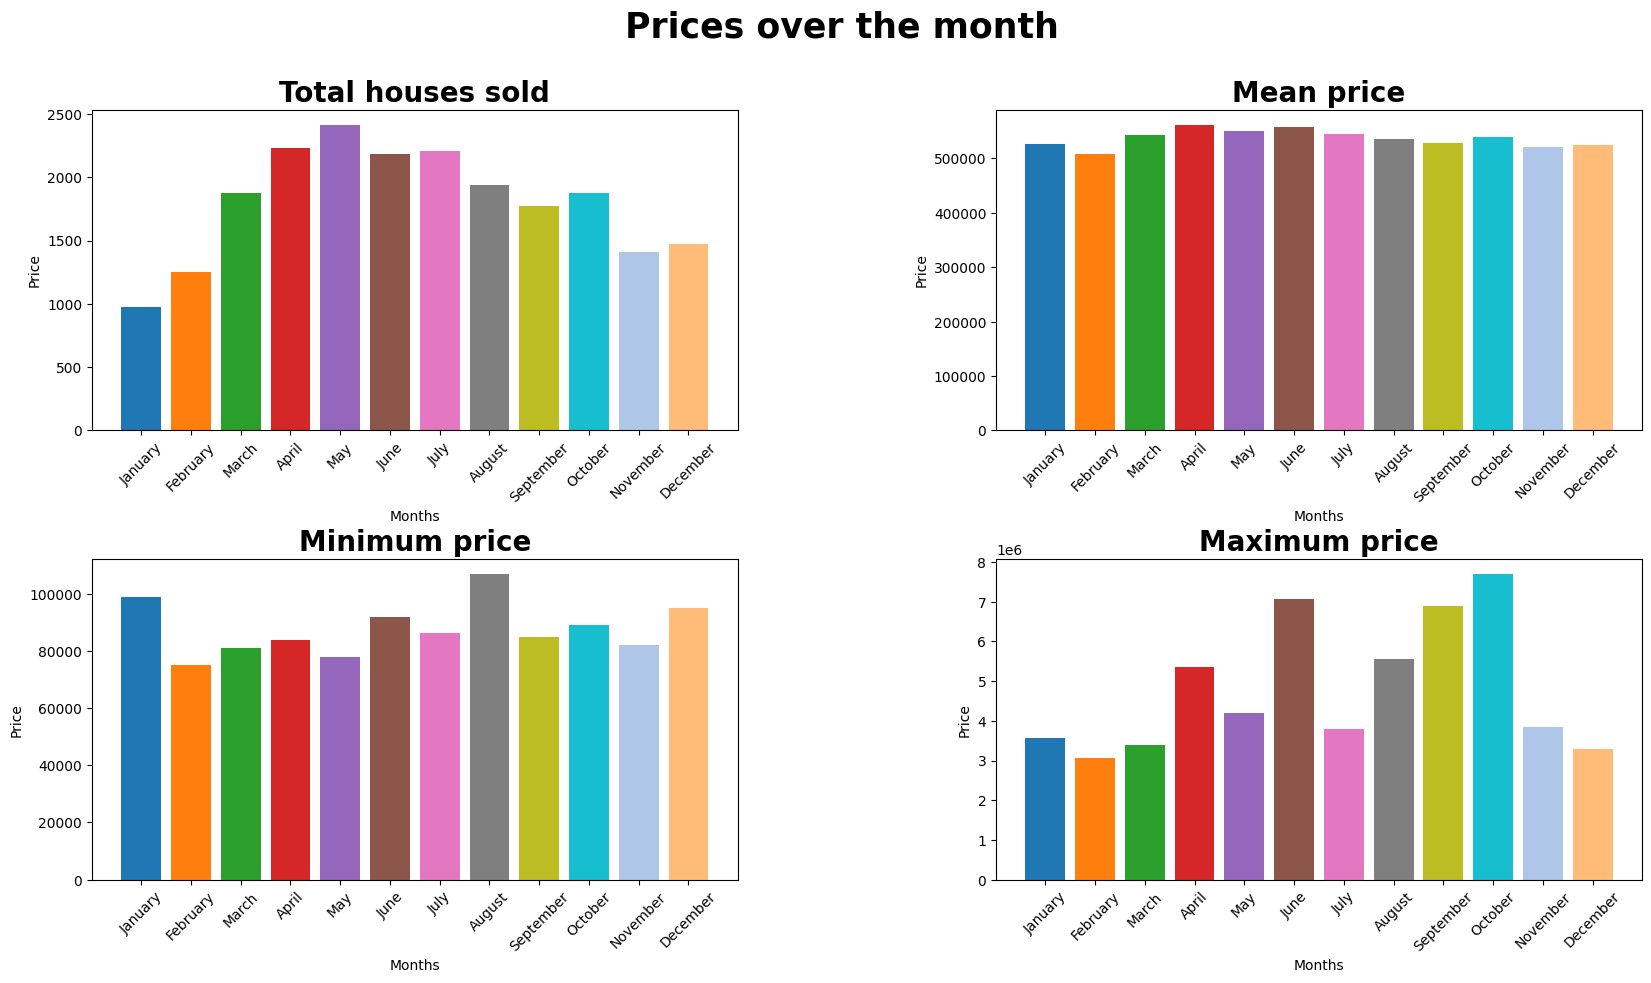

In [24]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
labels = ['Total houses sold', 'Mean price', 'Minimum price', 'Maximum price']
columns = ['count', 'mean', 'min', 'max']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.suptitle("Prices over the month", fontsize = 25, fontweight = 'bold')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, ax in enumerate(axs.flat):
    ax.bar(grouped_month.index, grouped_month[columns[i]], color = colors)
    ax.set_title(labels[i], fontsize=20, fontweight='bold')
    ax.set_xlabel("Months")
    ax.set_ylabel("Price")
    ax.set_xticks(range(1, len(months)+1))
    ax.set_xticklabels(months)
    ax.tick_params(axis='x', rotation=45)
    
plt.show()

1. More no of houses are sold in the months of april to july.
2. Prices of the houses were very high in the months april, in 2015 and june, in 2014.

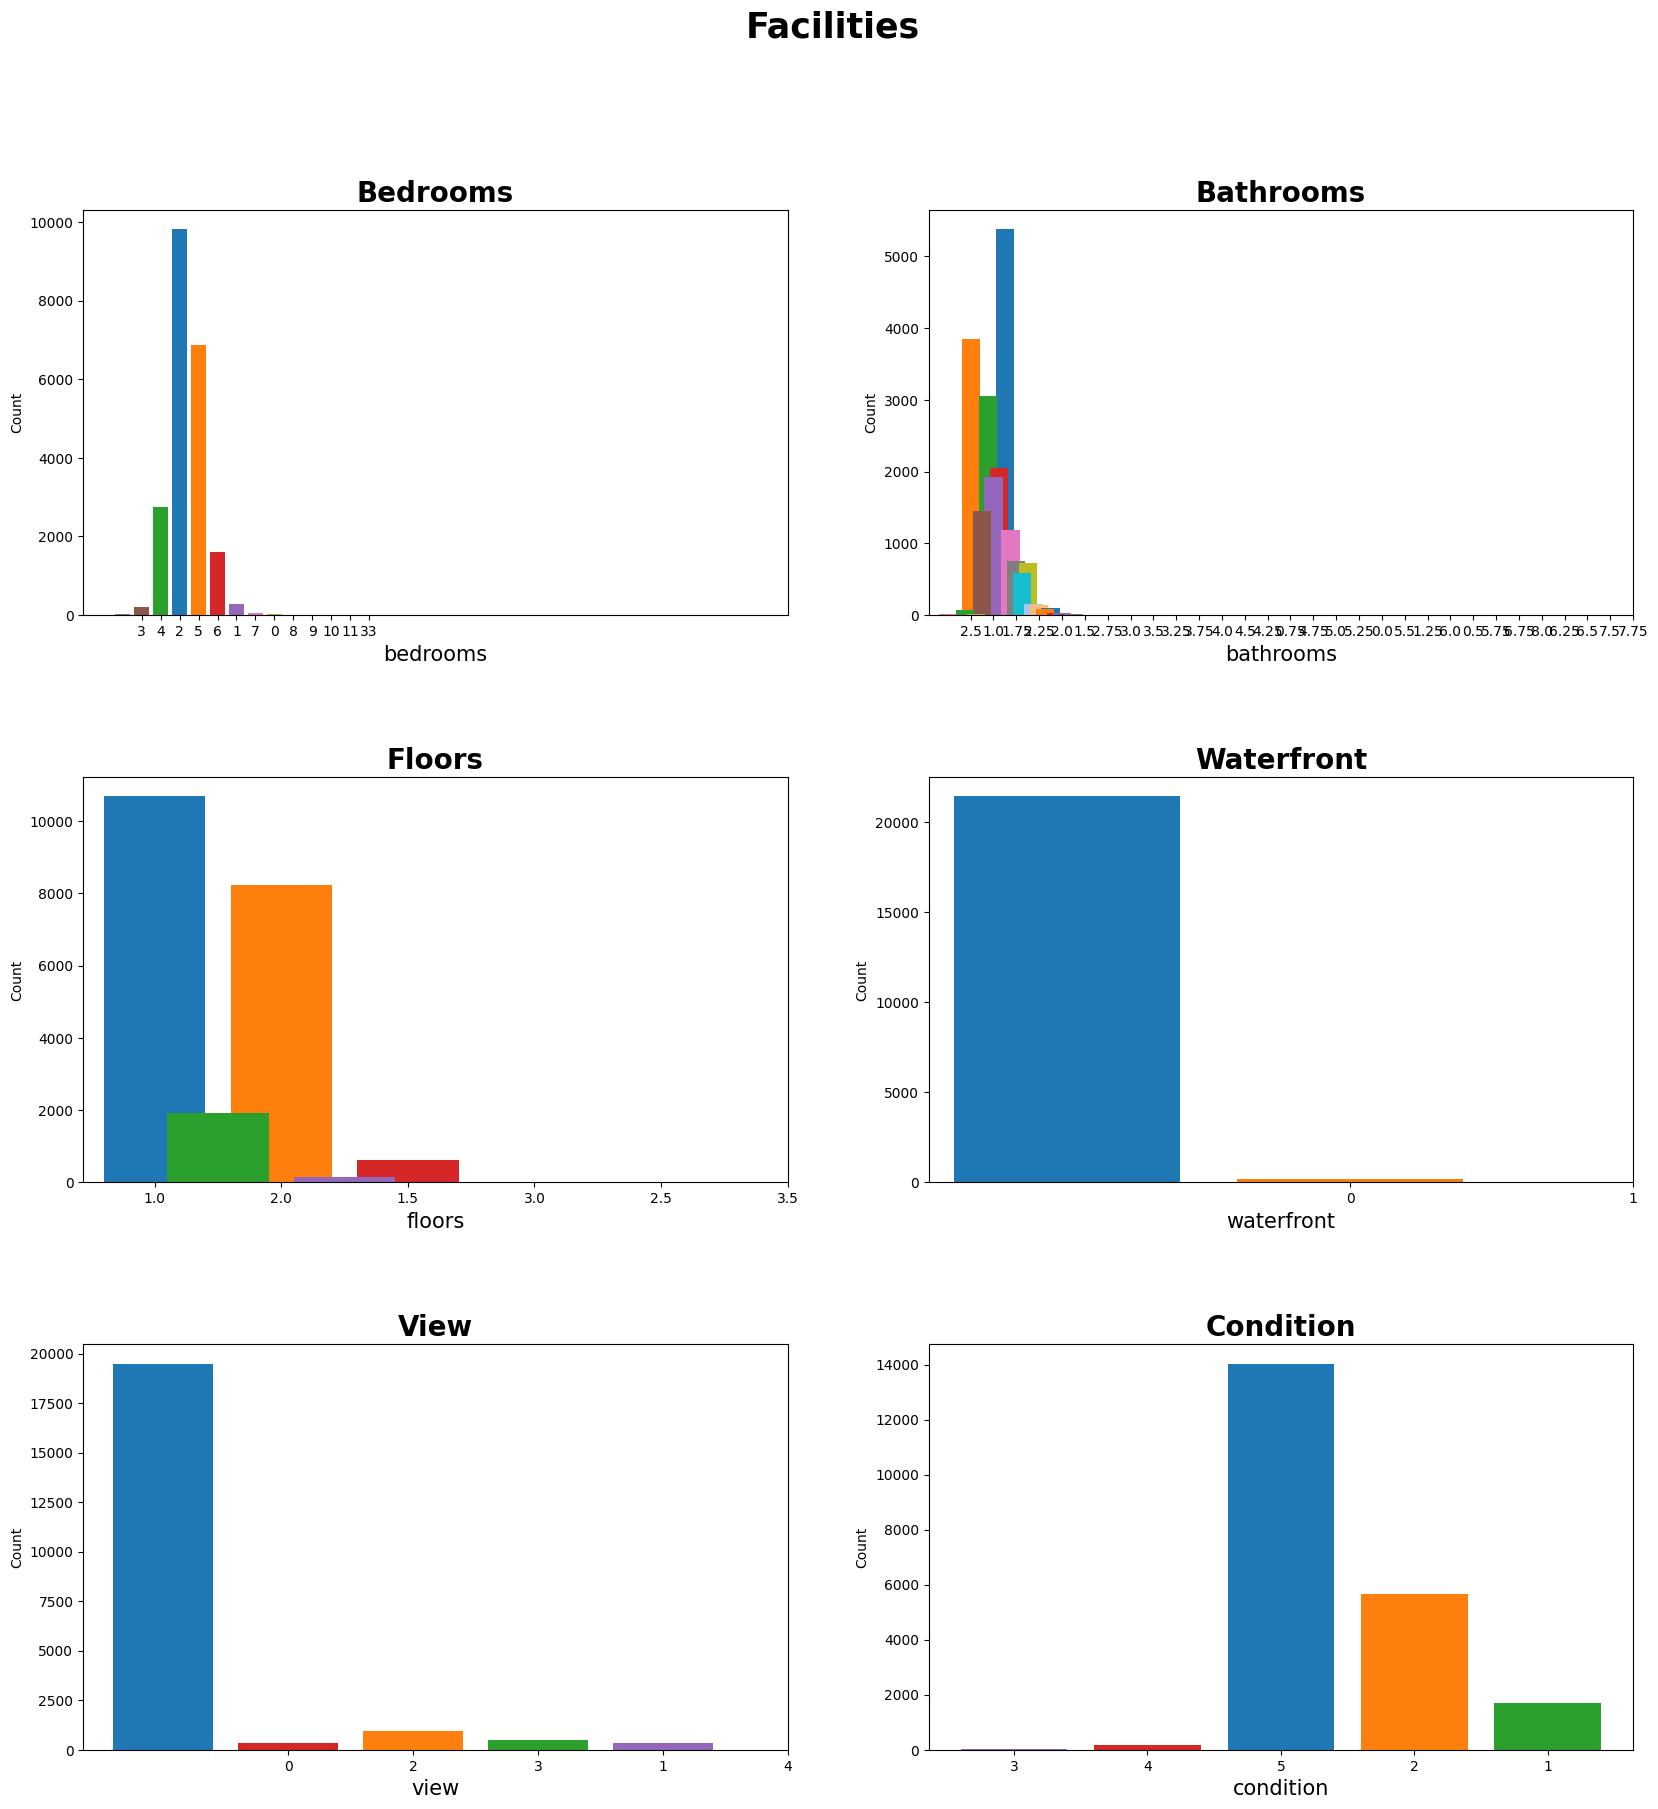

In [36]:
columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']


fig, axs = plt.subplots(3, 2, figsize = (20, 20))
fig.suptitle("Facilities", fontsize = 25, fontweight = 'bold')
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)


for i, ax in enumerate(axs.flat):
    ax.bar(df[columns[i]].value_counts().index, df[columns[i]].value_counts().values, color = colors)
    ax.set_title(columns[i].capitalize(), fontsize=20, fontweight='bold')
    ax.set_xlabel(columns[i], fontsize = 15)
    ax.set_ylabel("Count")
    ax.set_xticks(range(1, len(df[columns[i]].value_counts().index)+1))
    ax.set_xticklabels(df[columns[i]].value_counts().index)
    
plt.show()

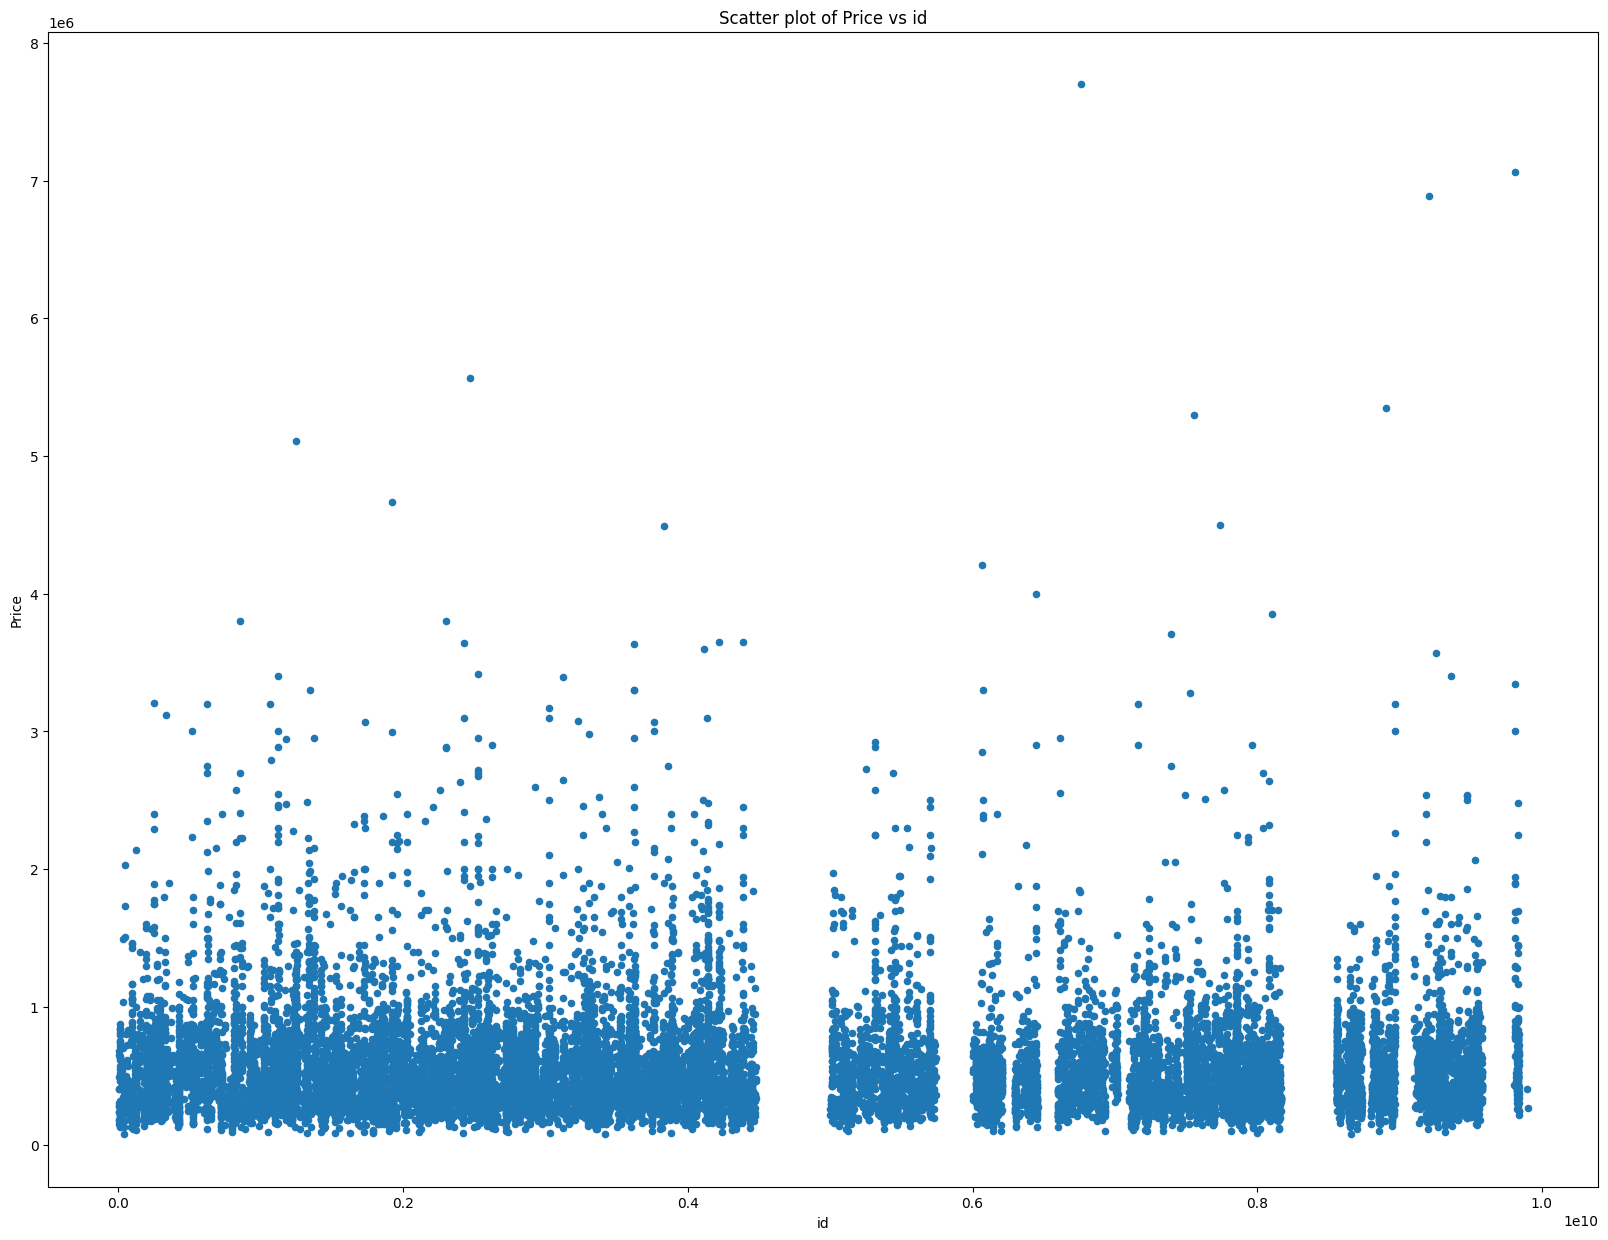

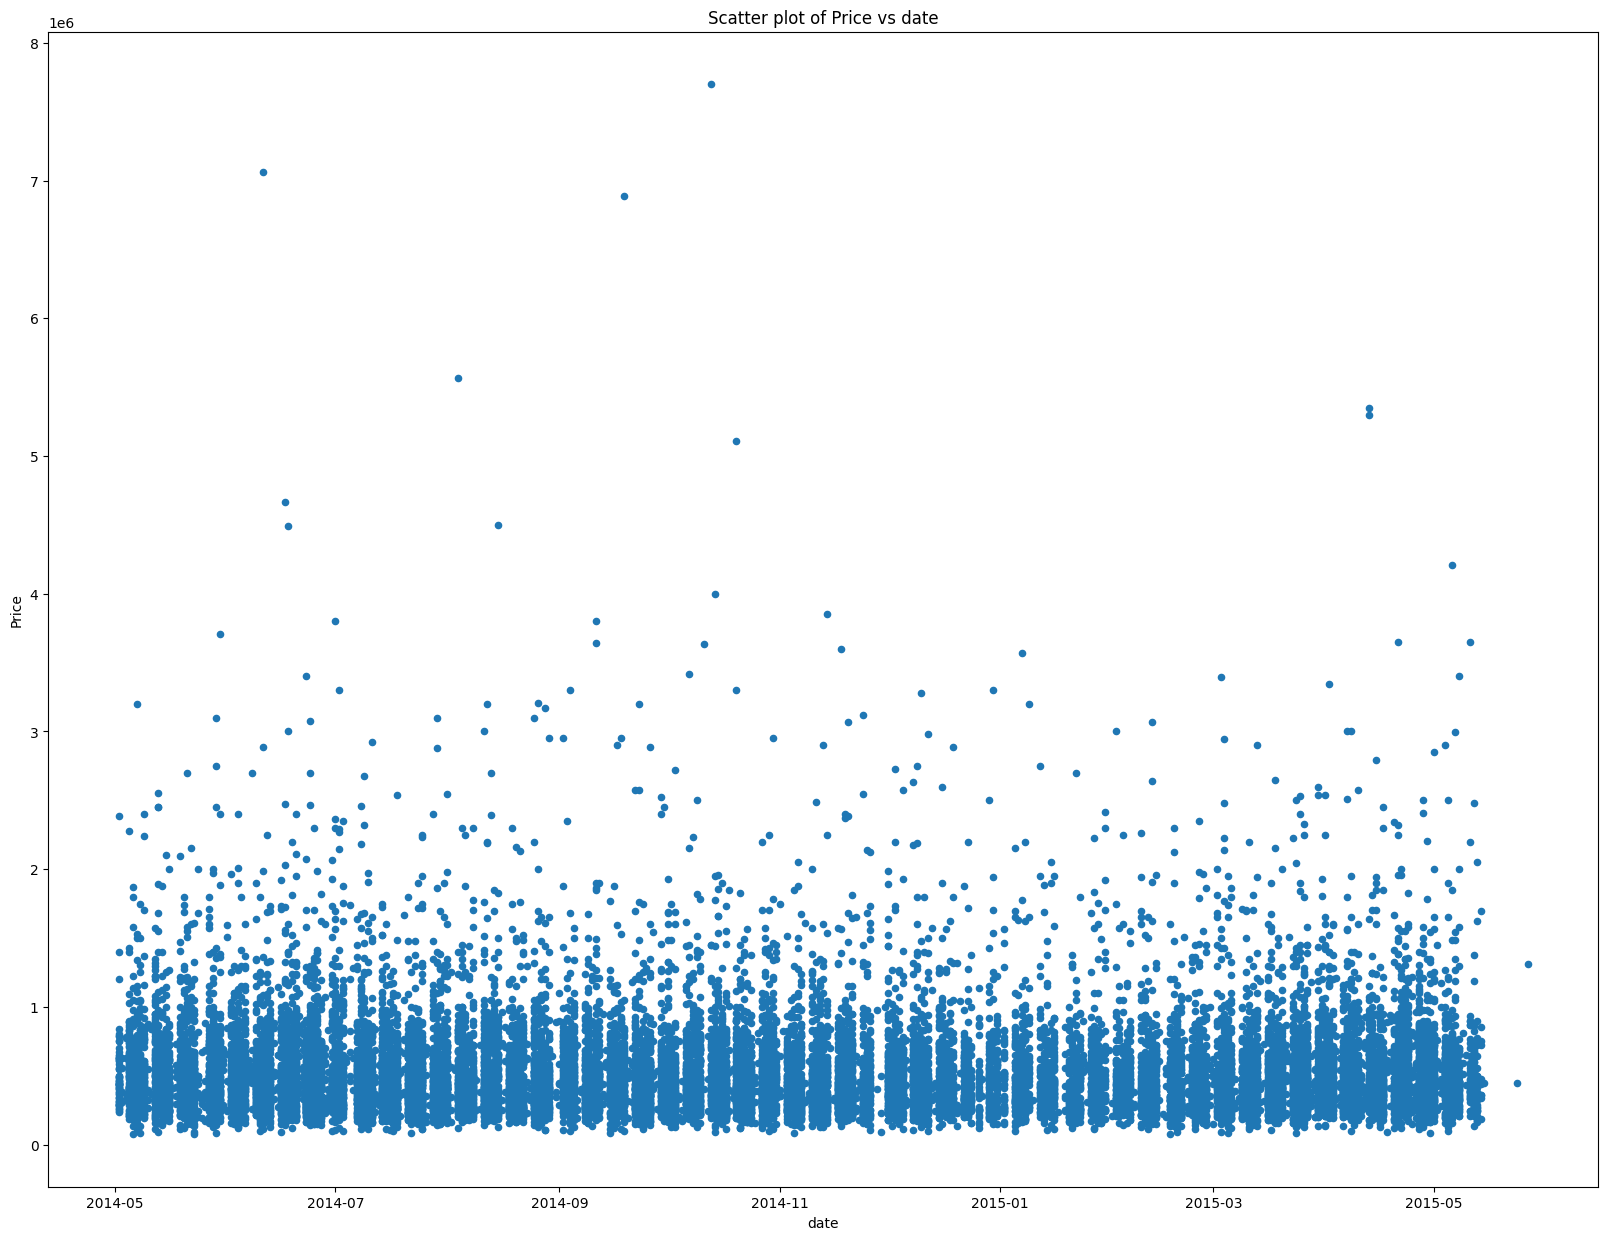

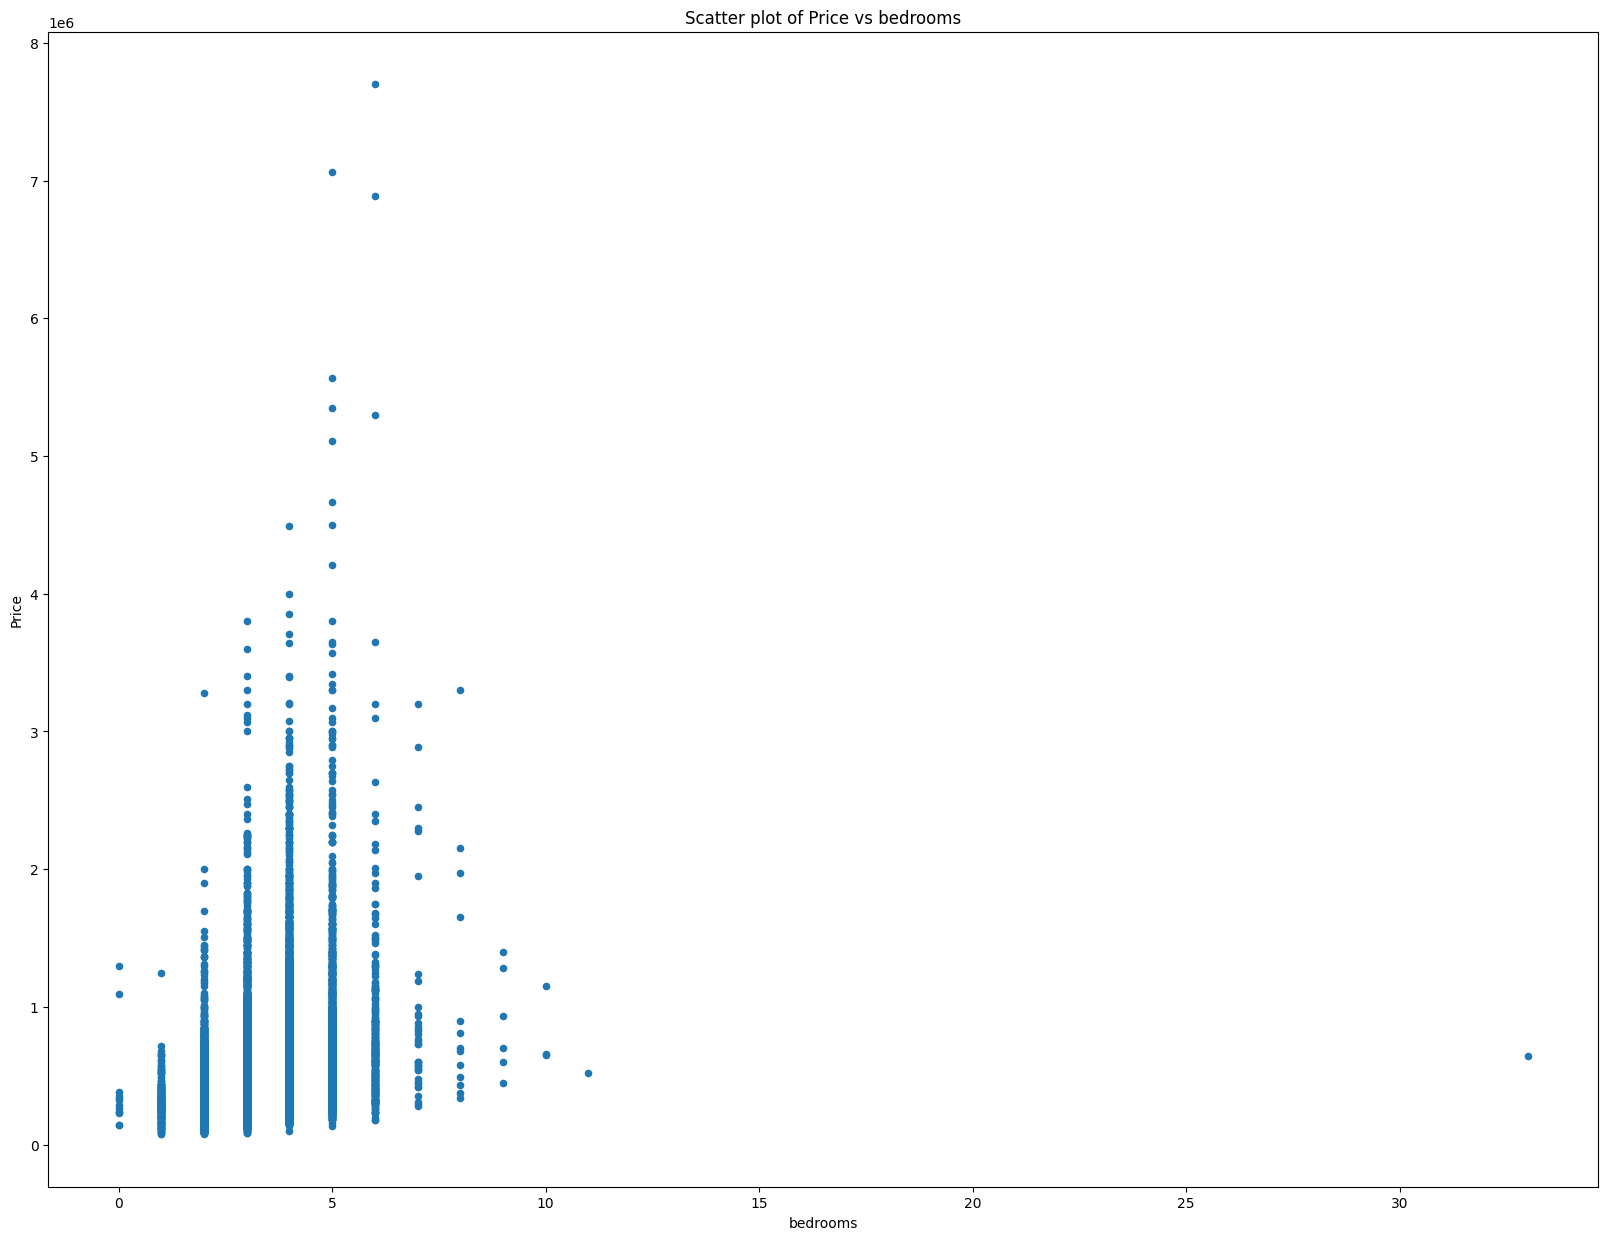

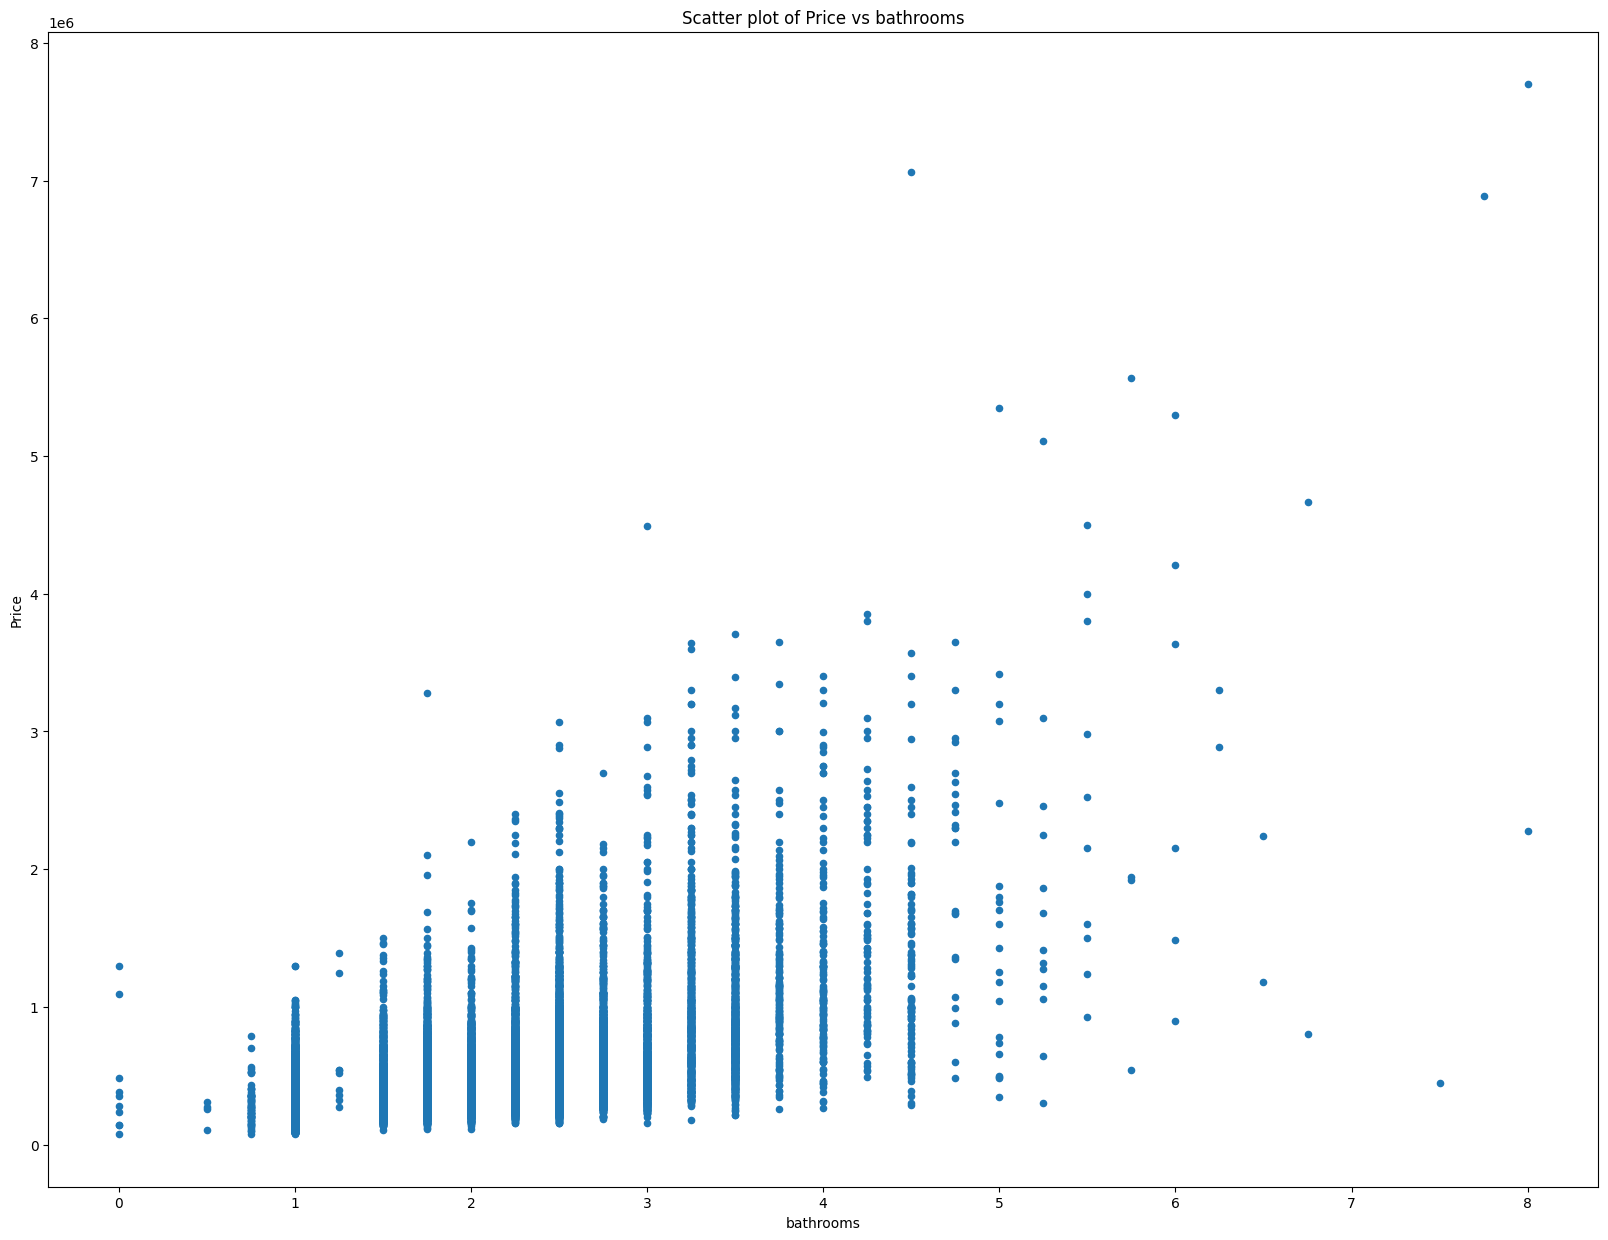

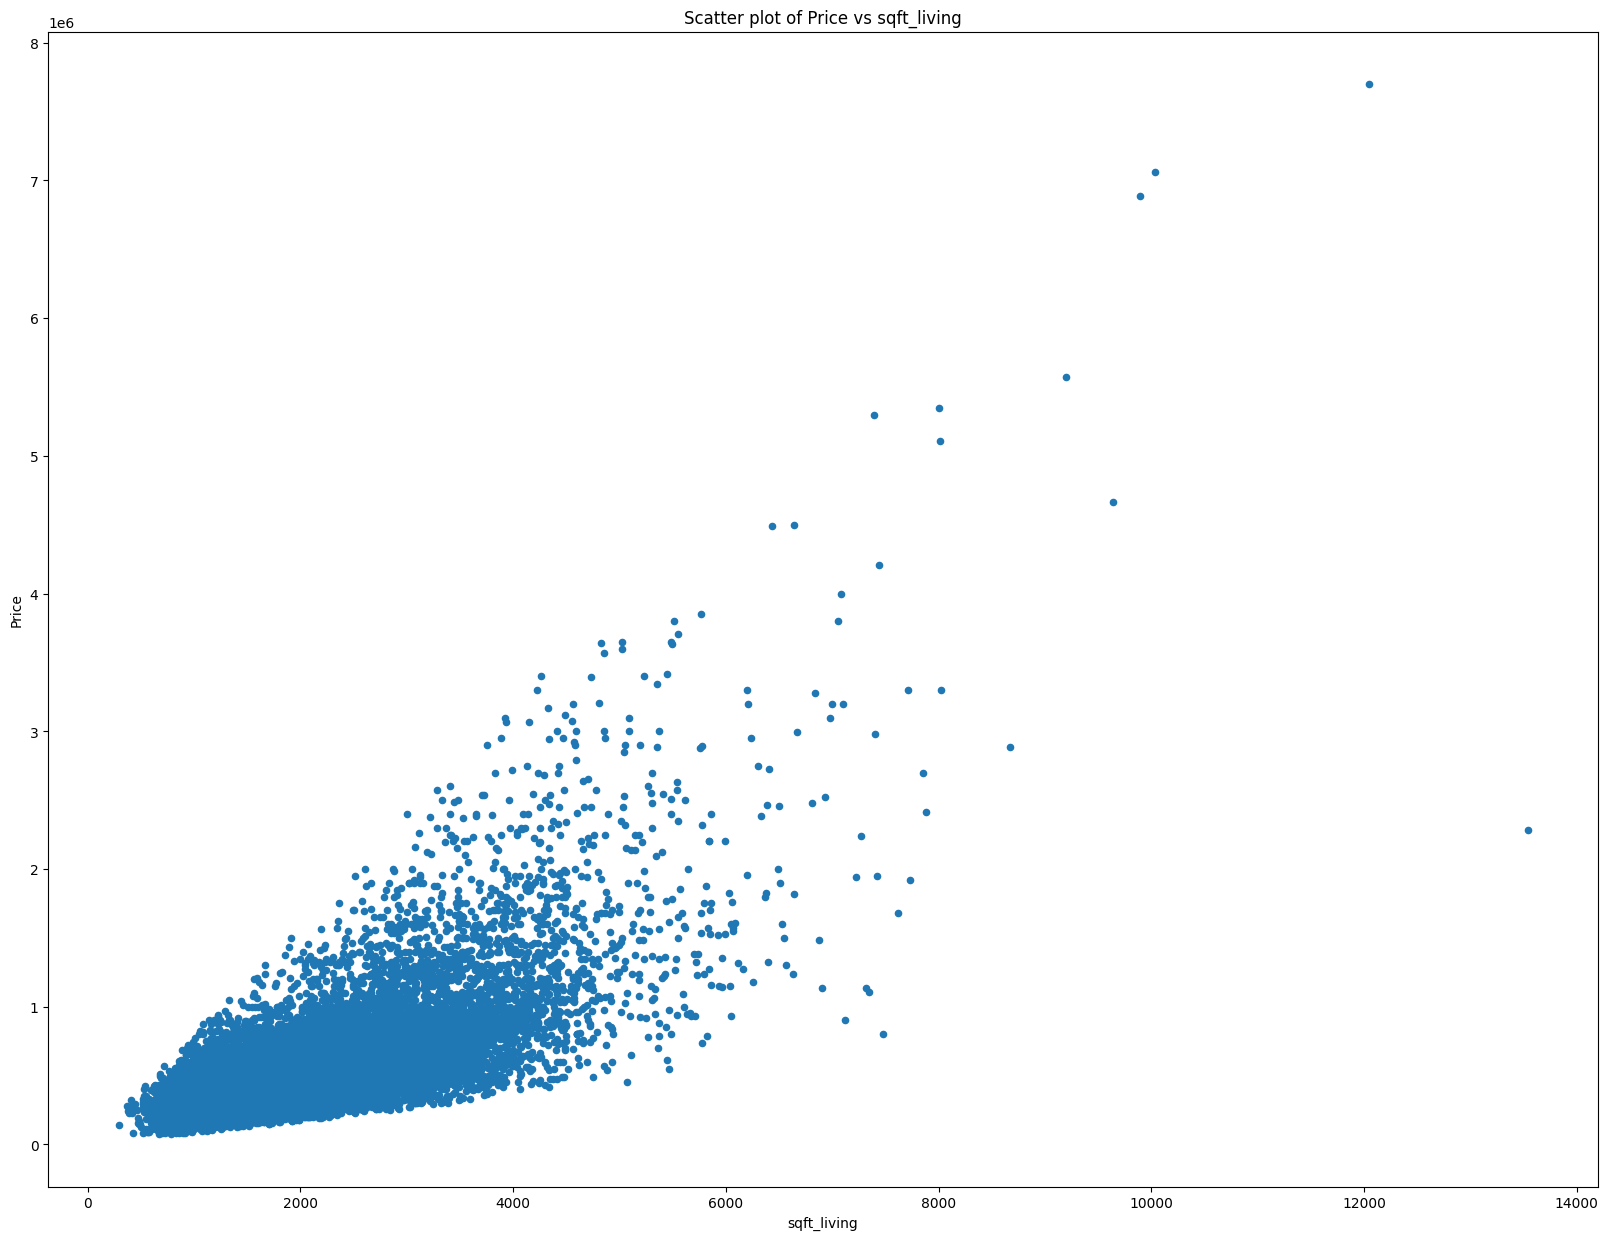

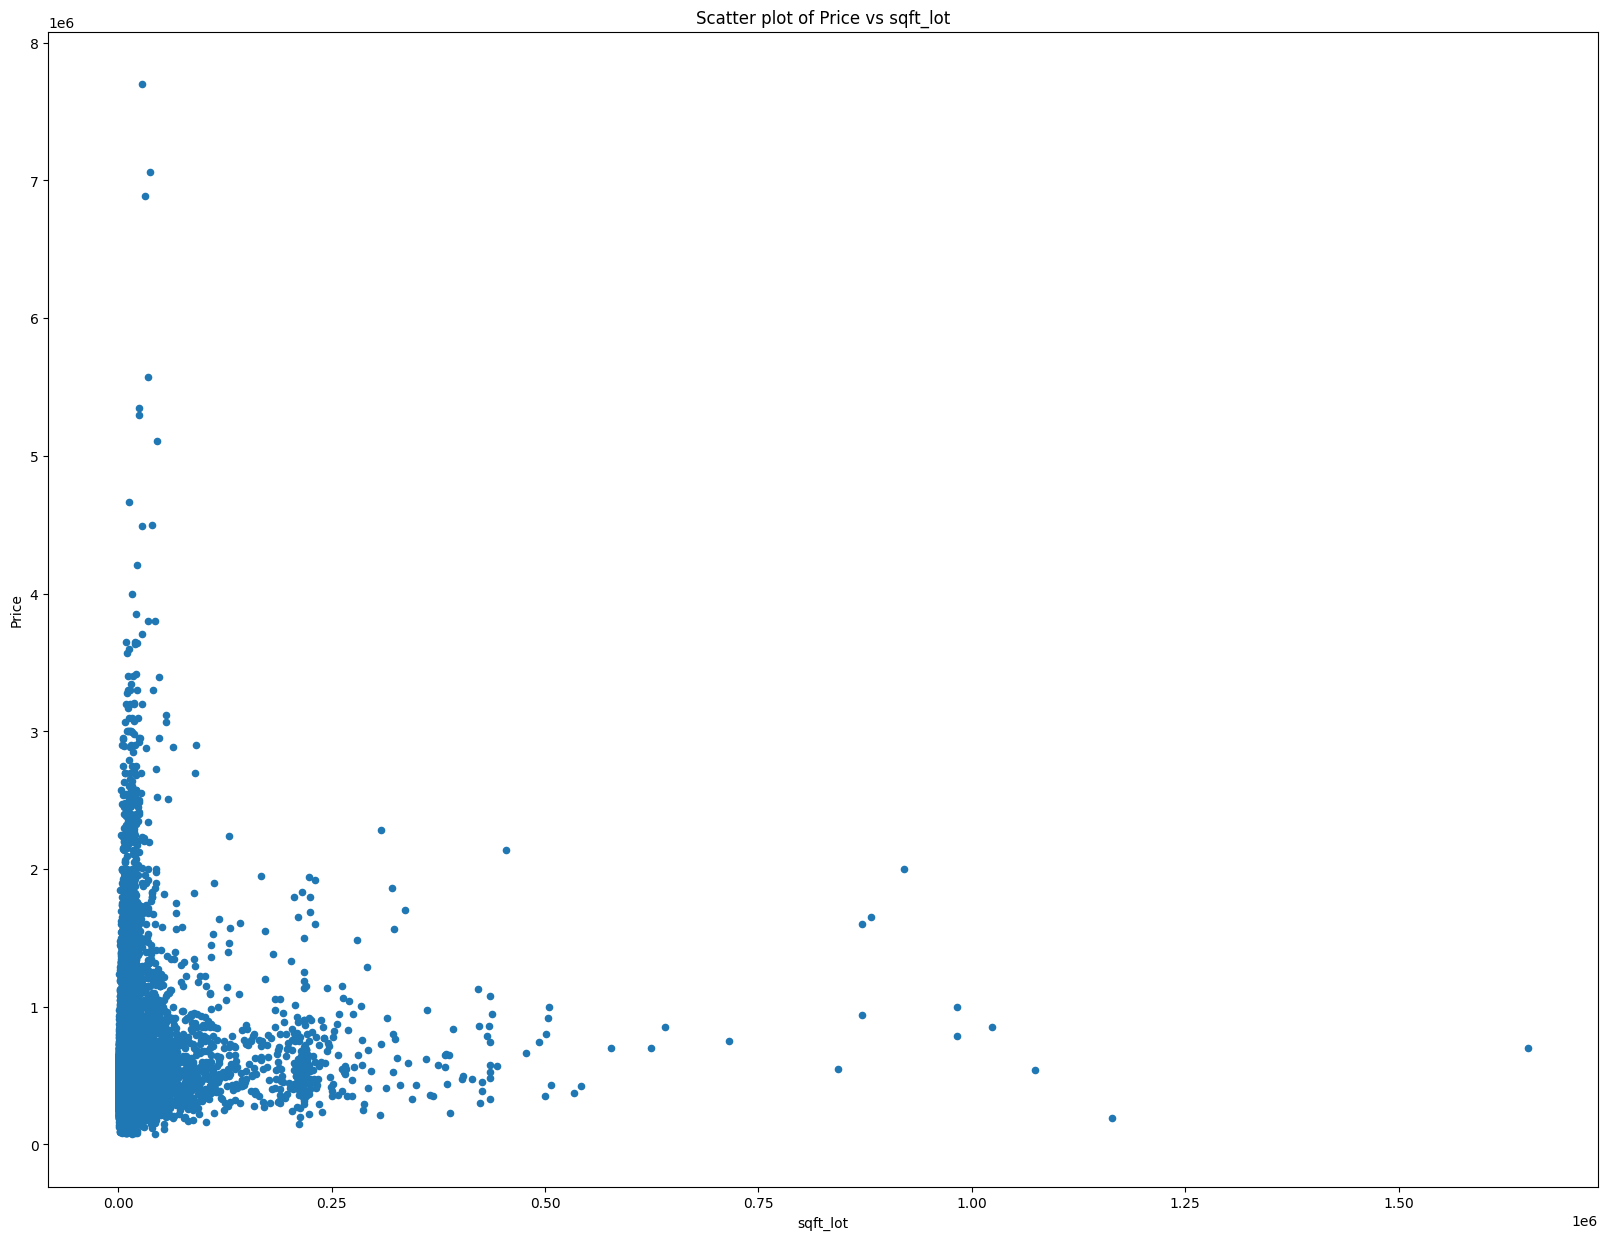

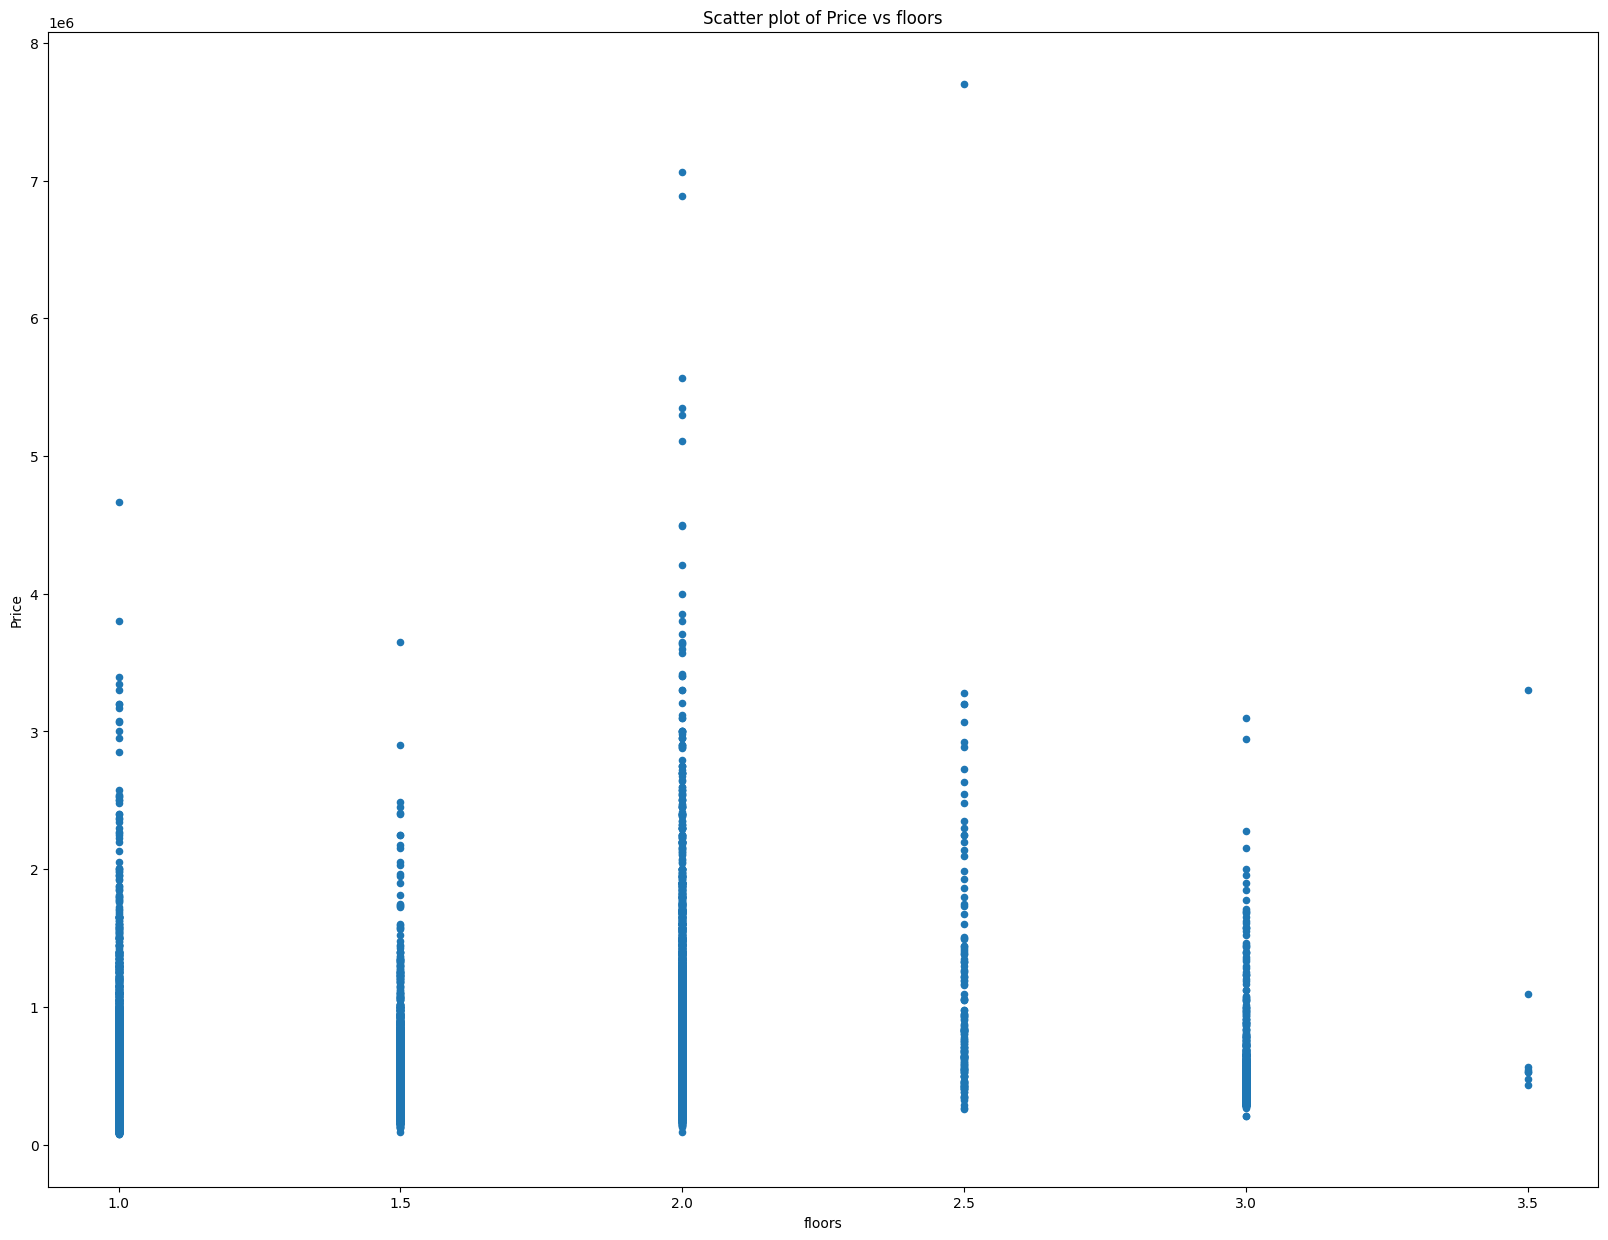

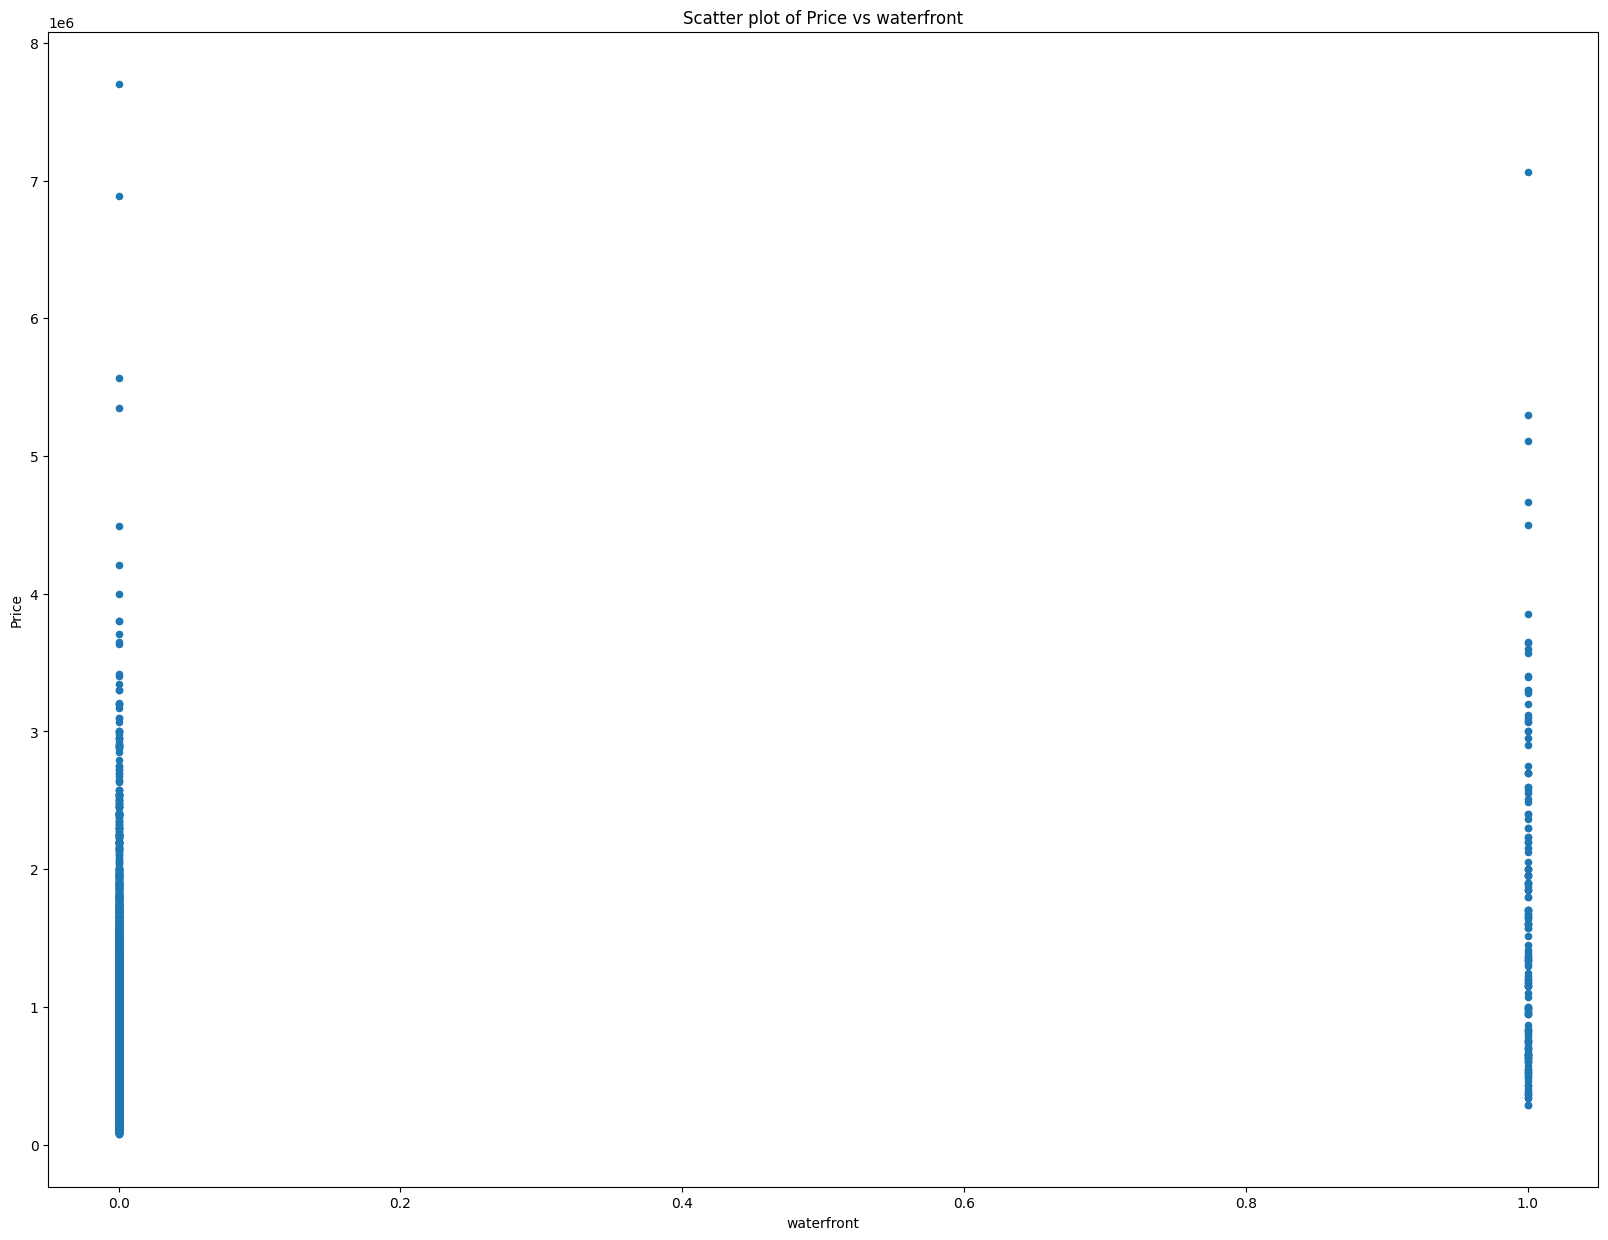

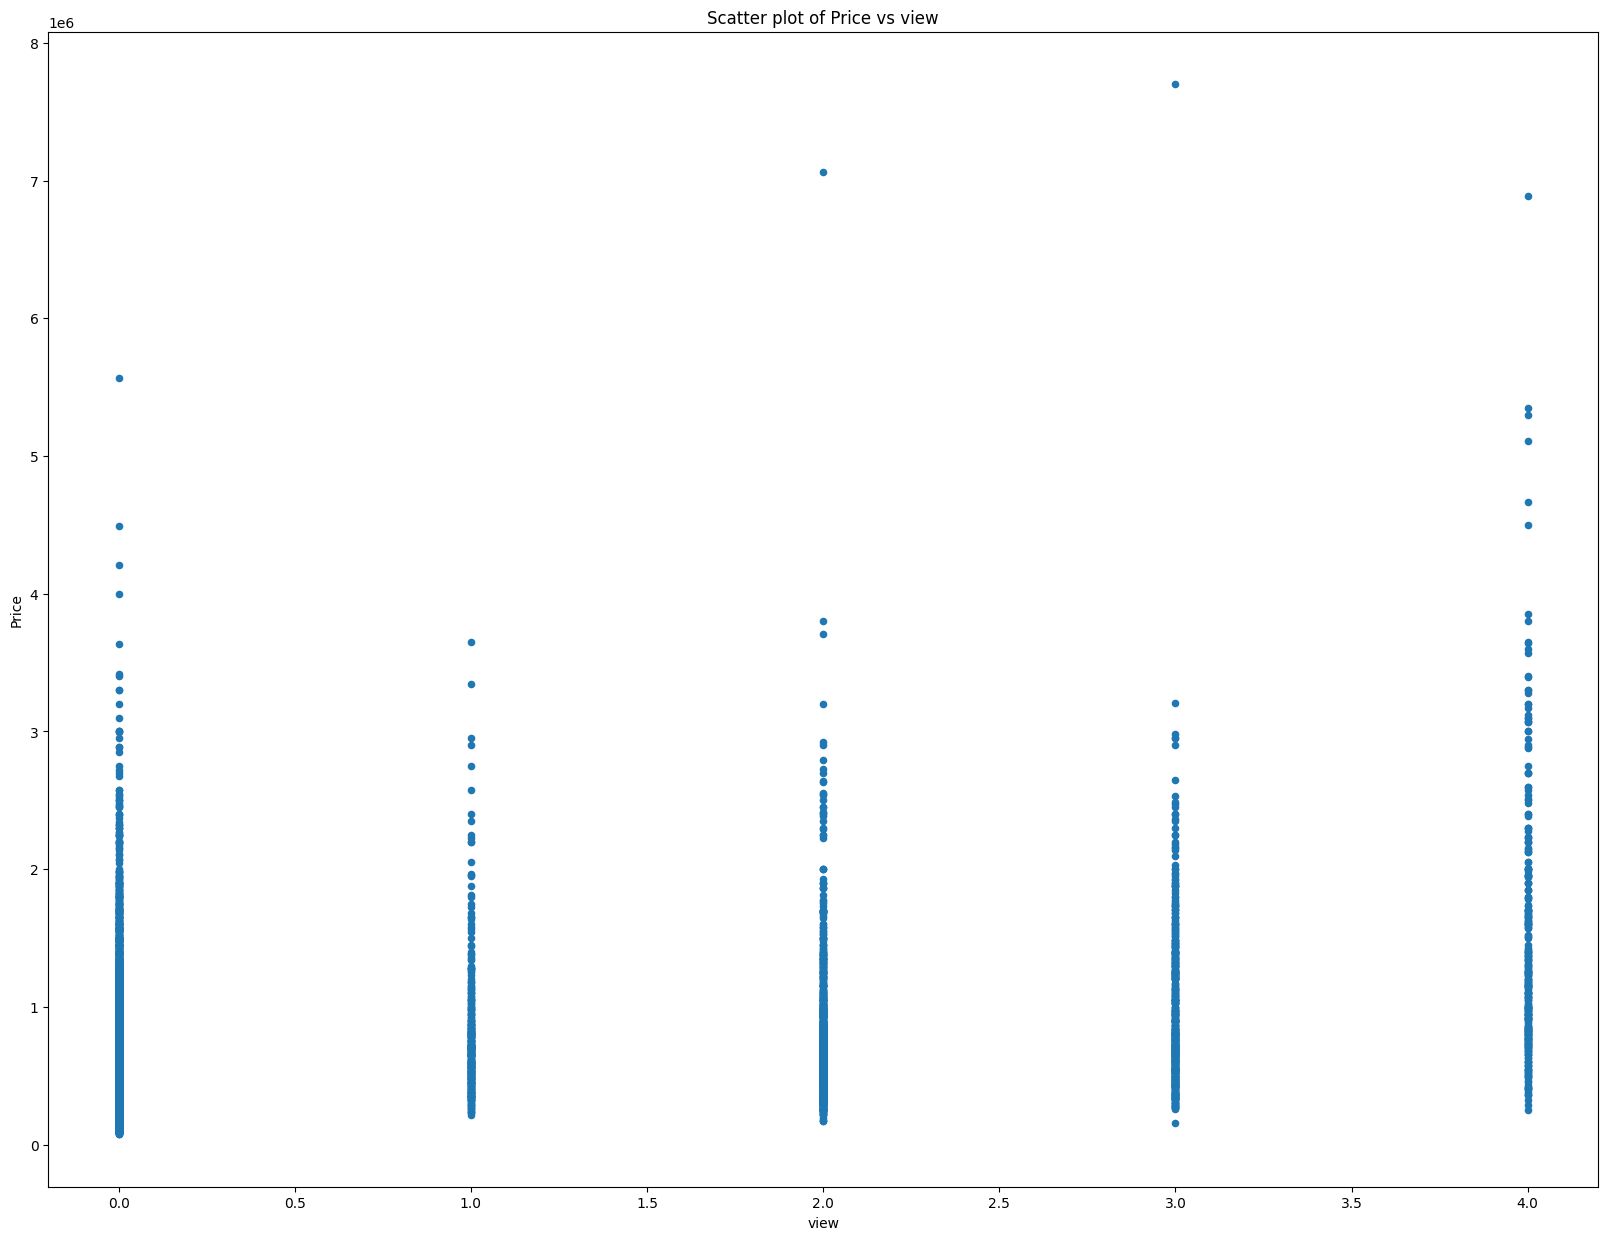

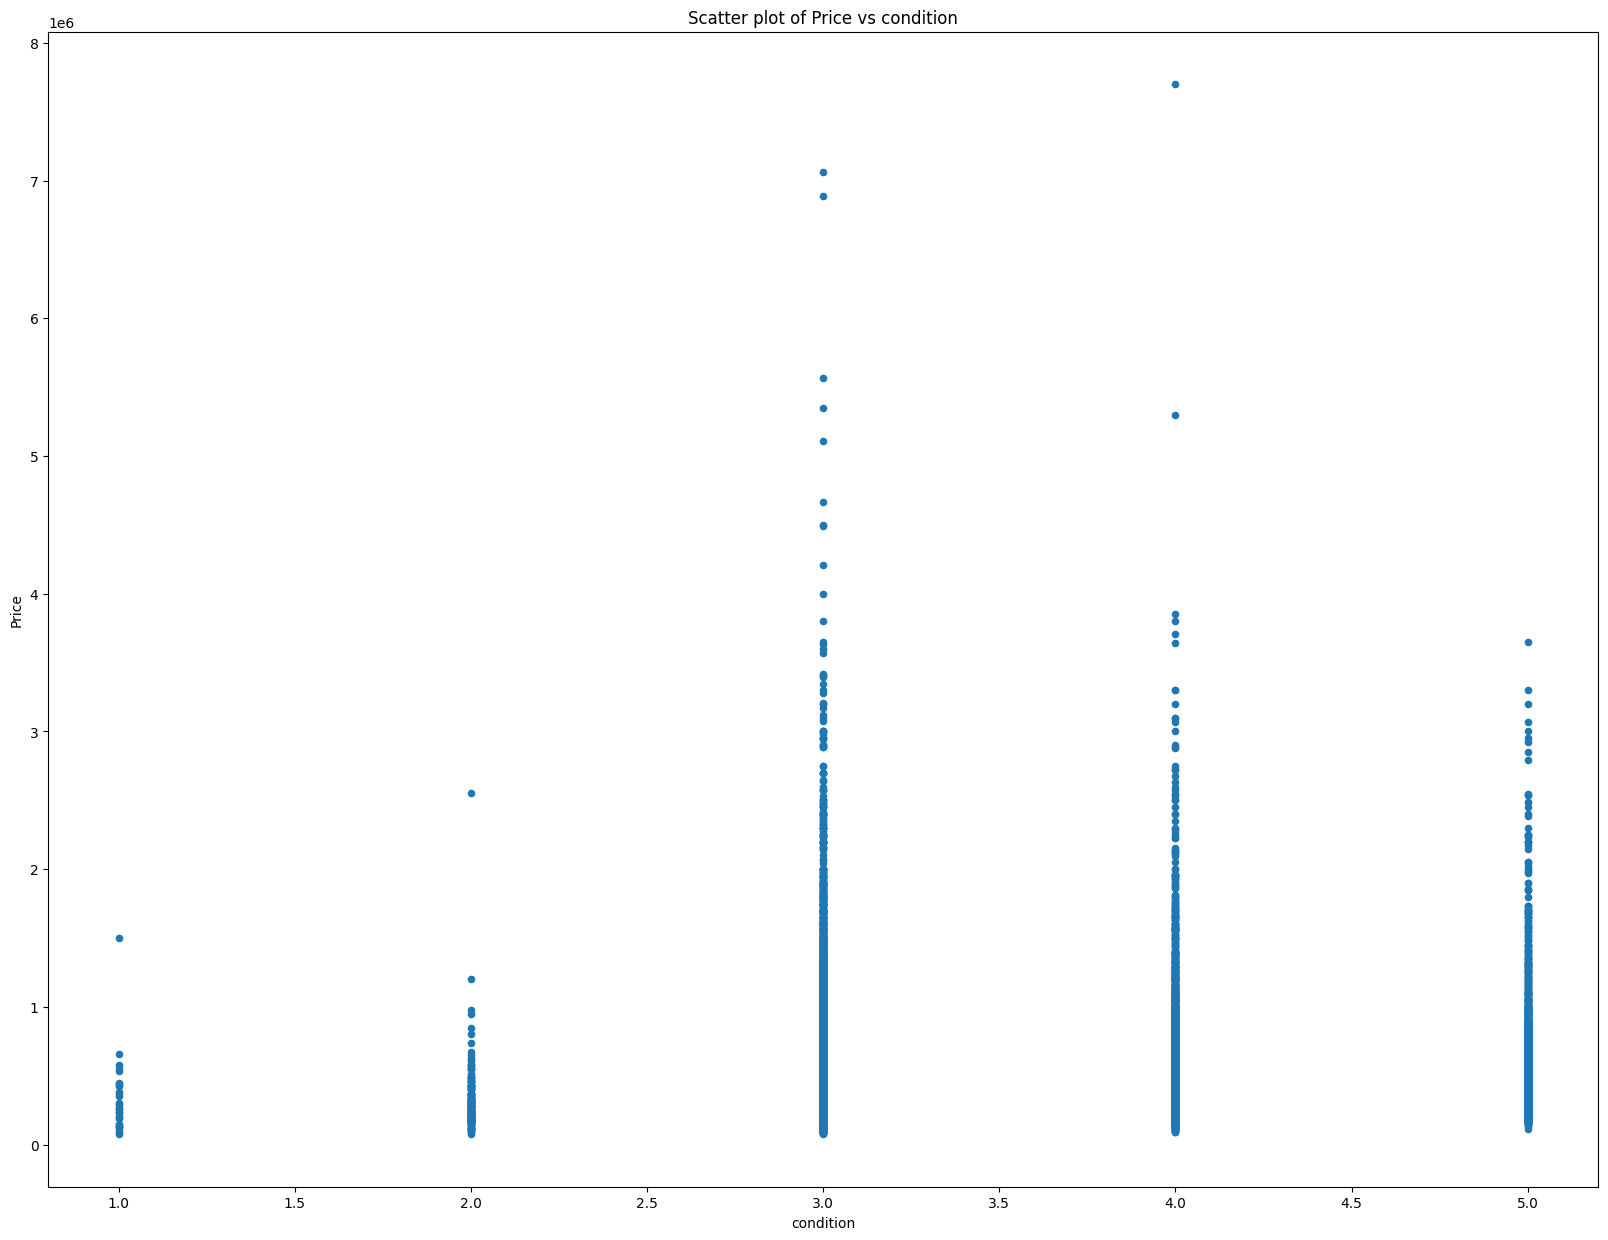

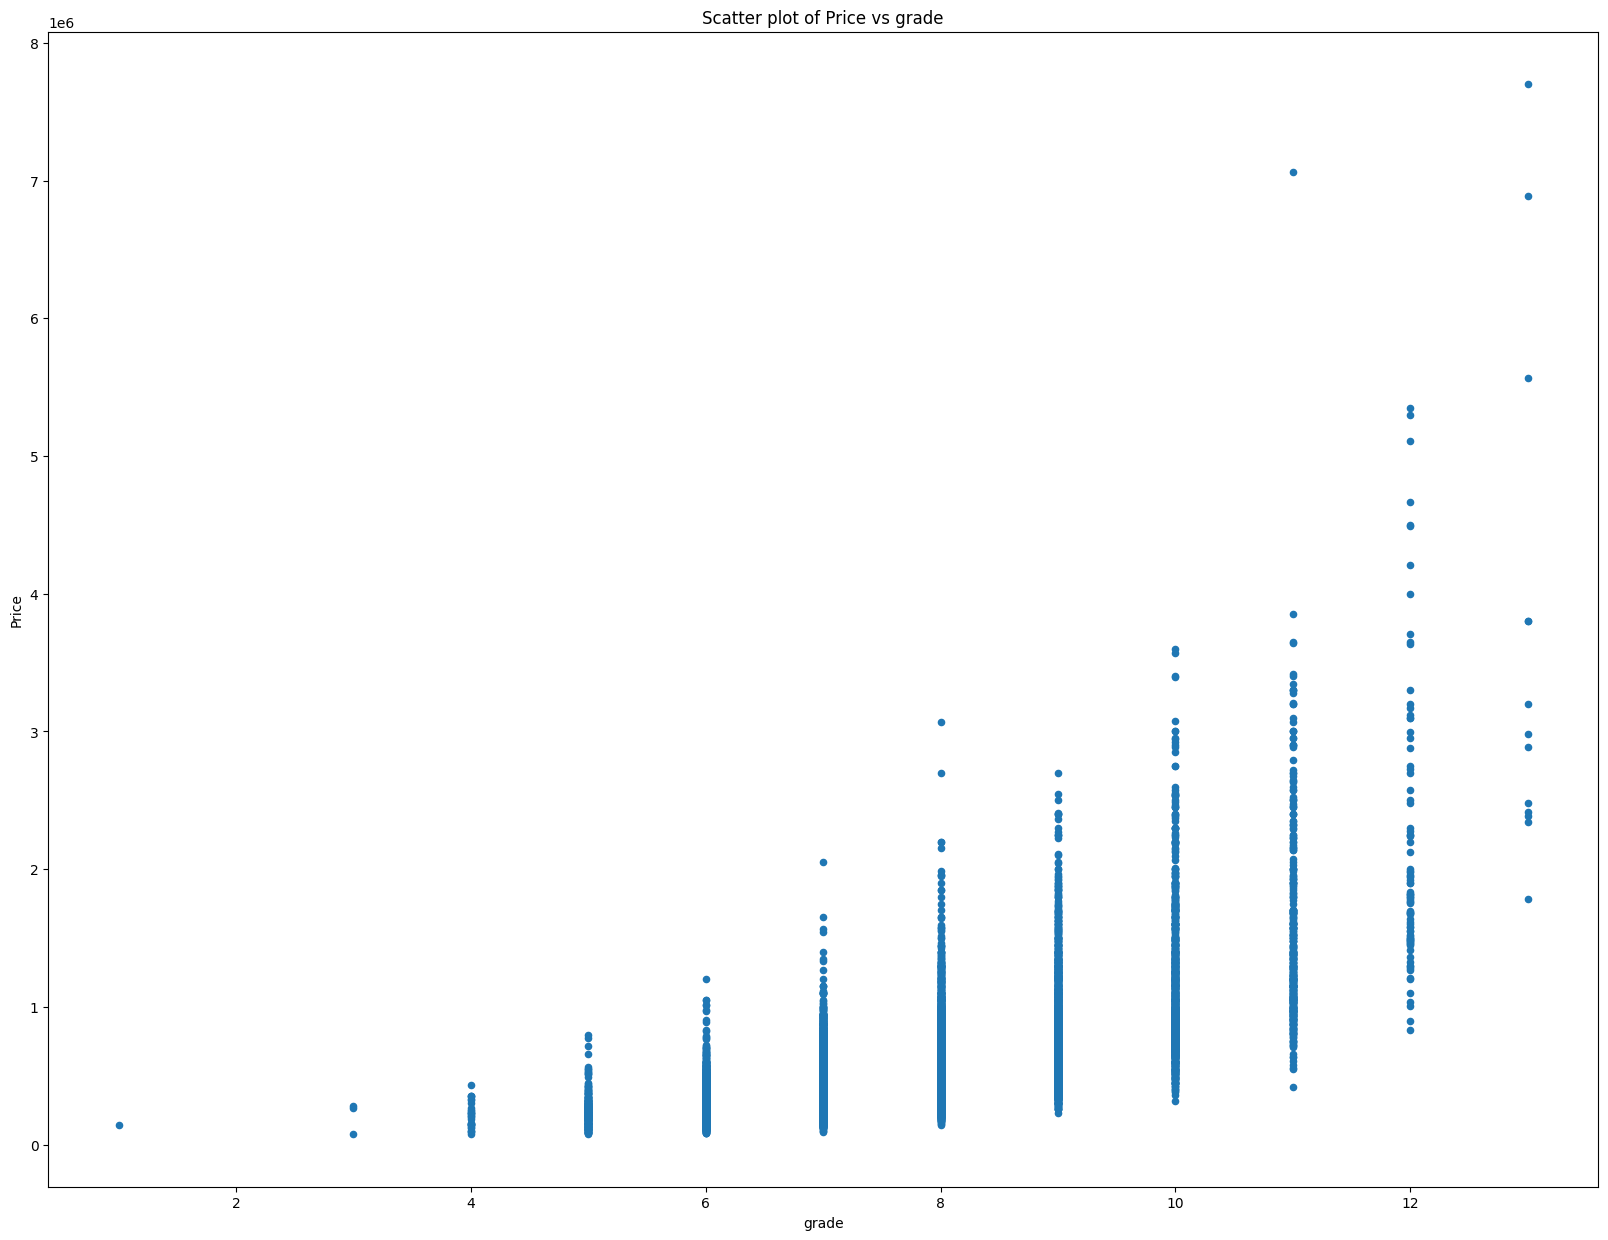

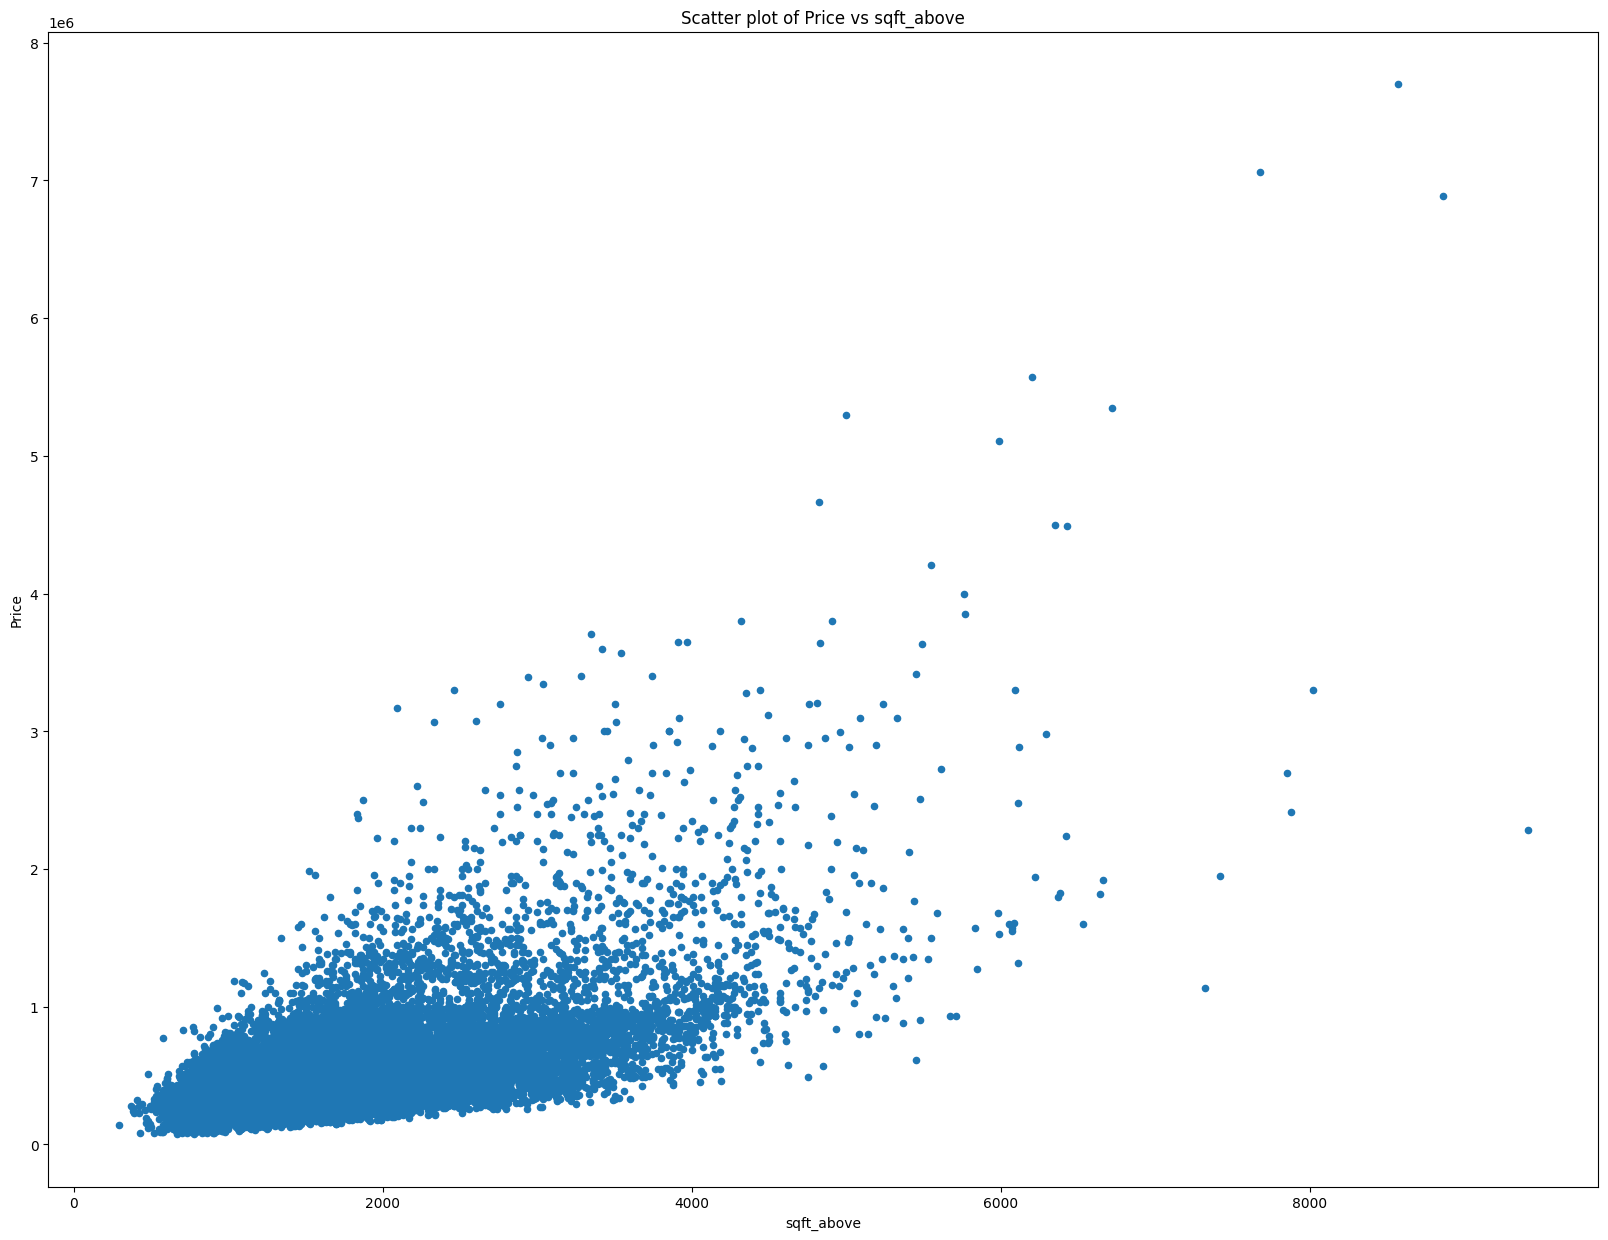

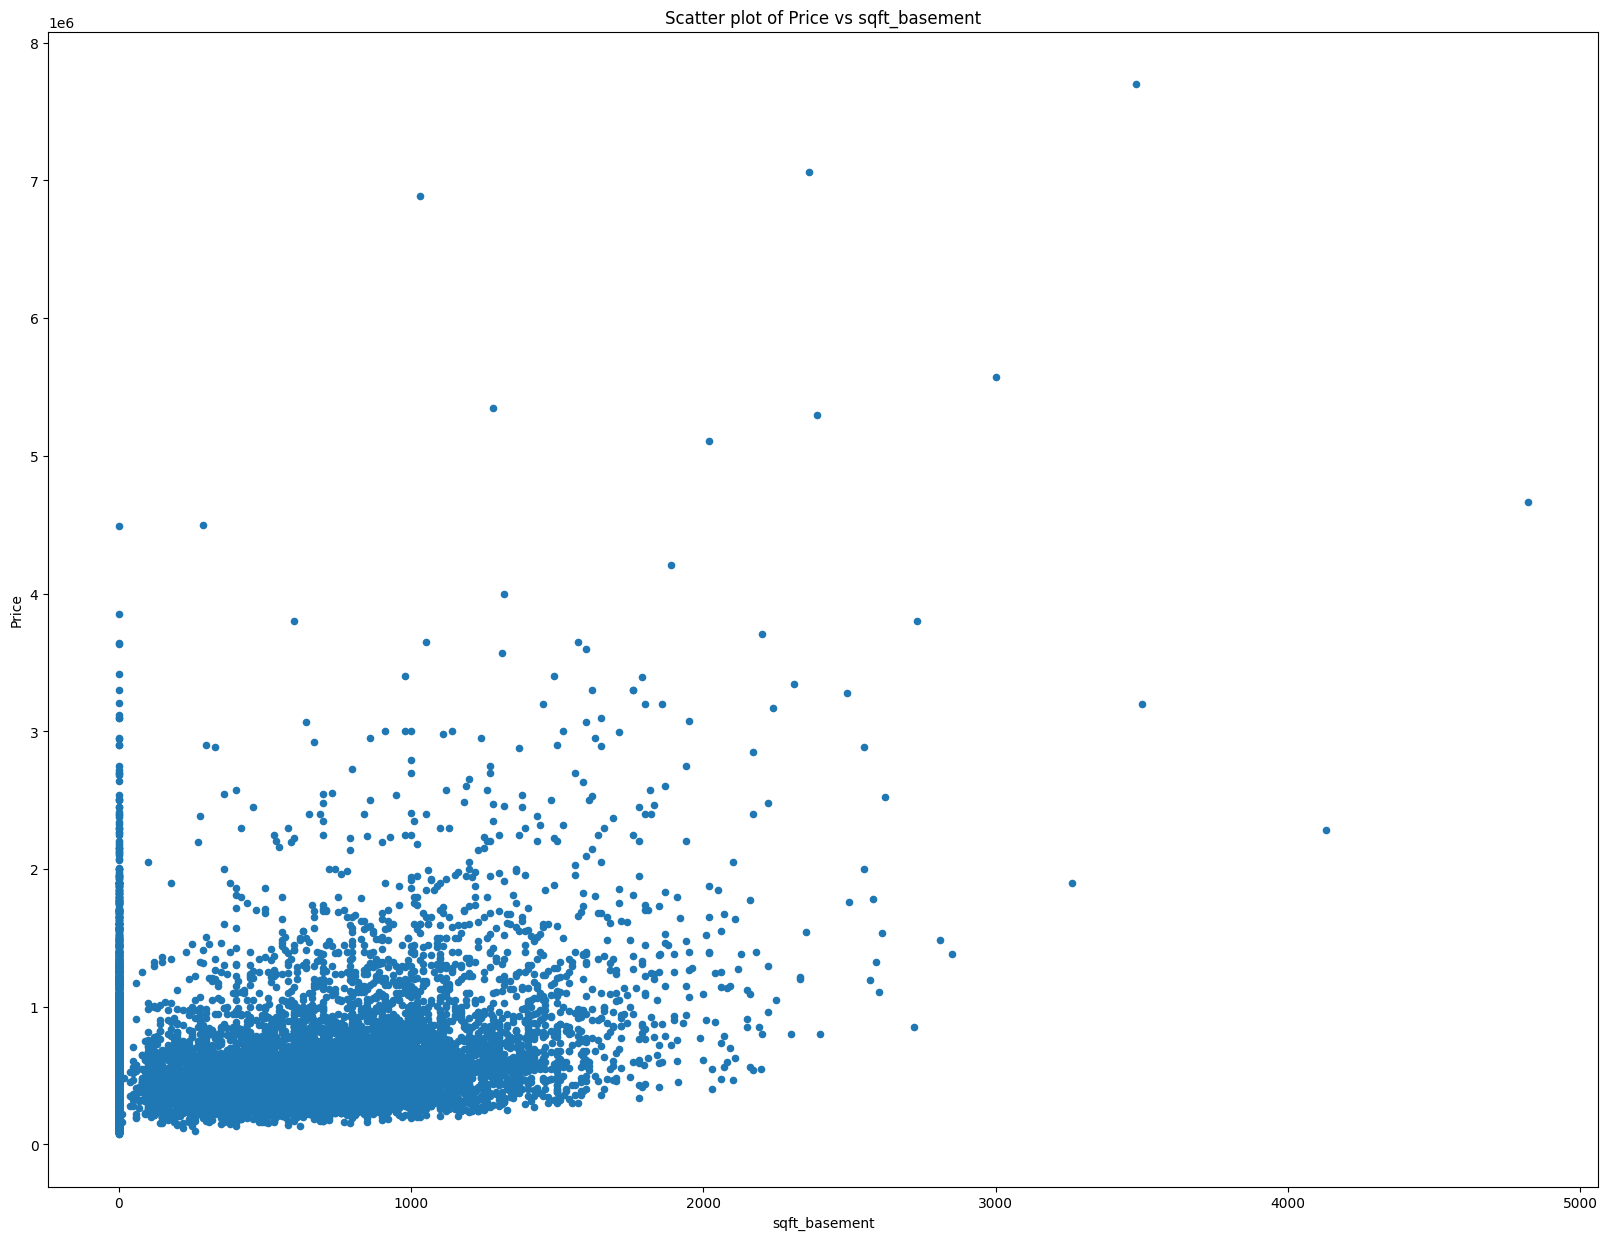

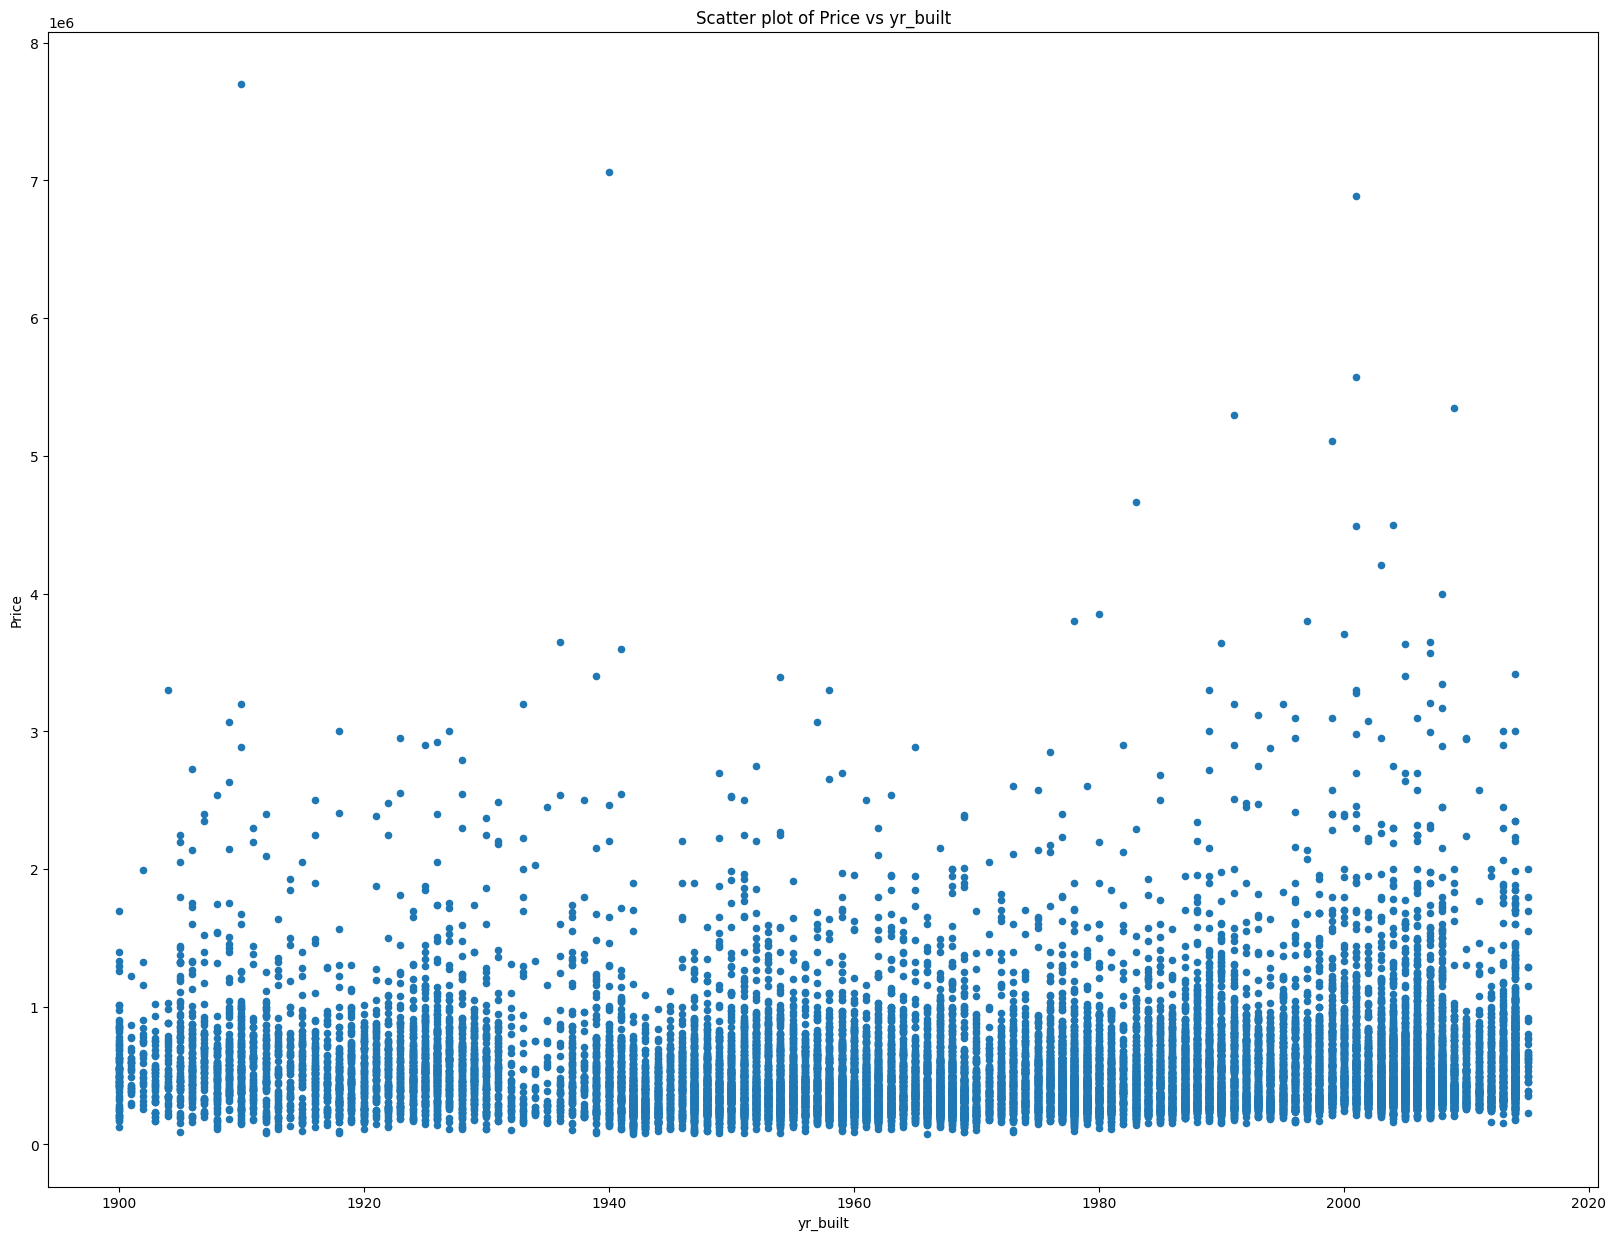

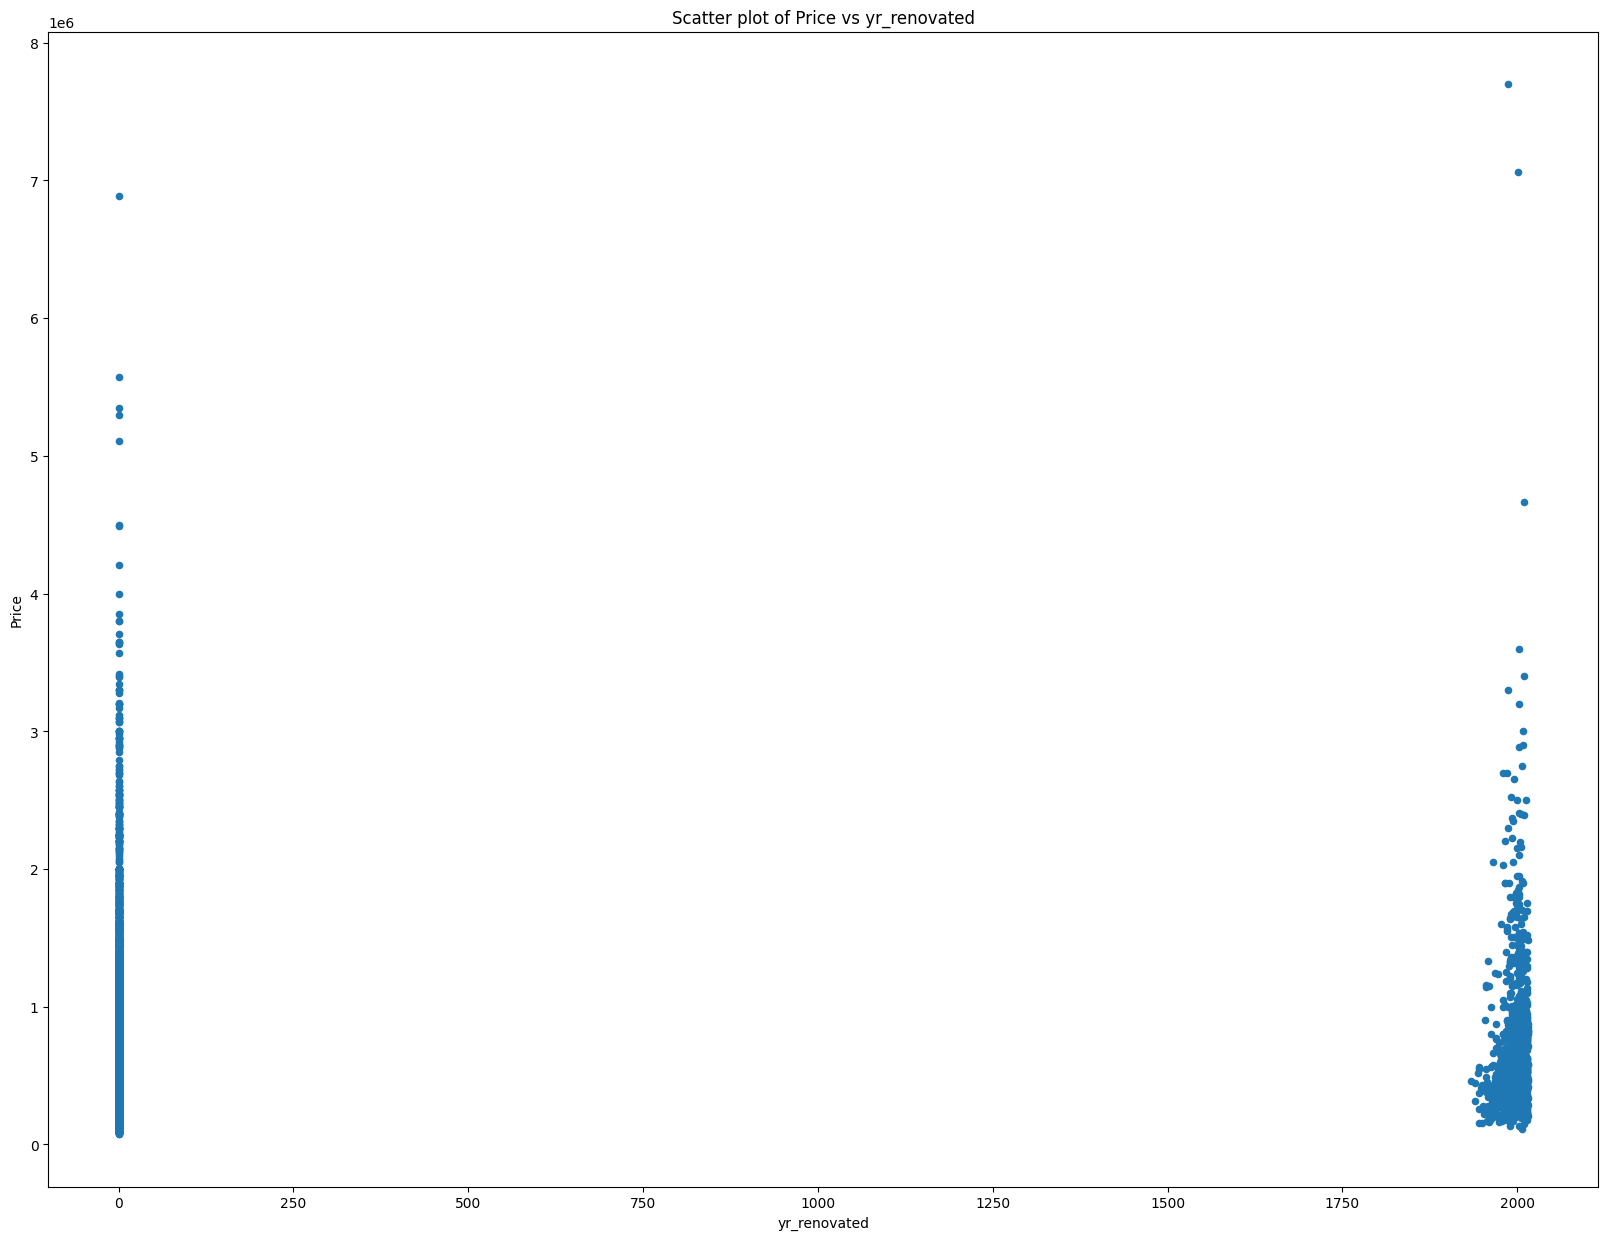

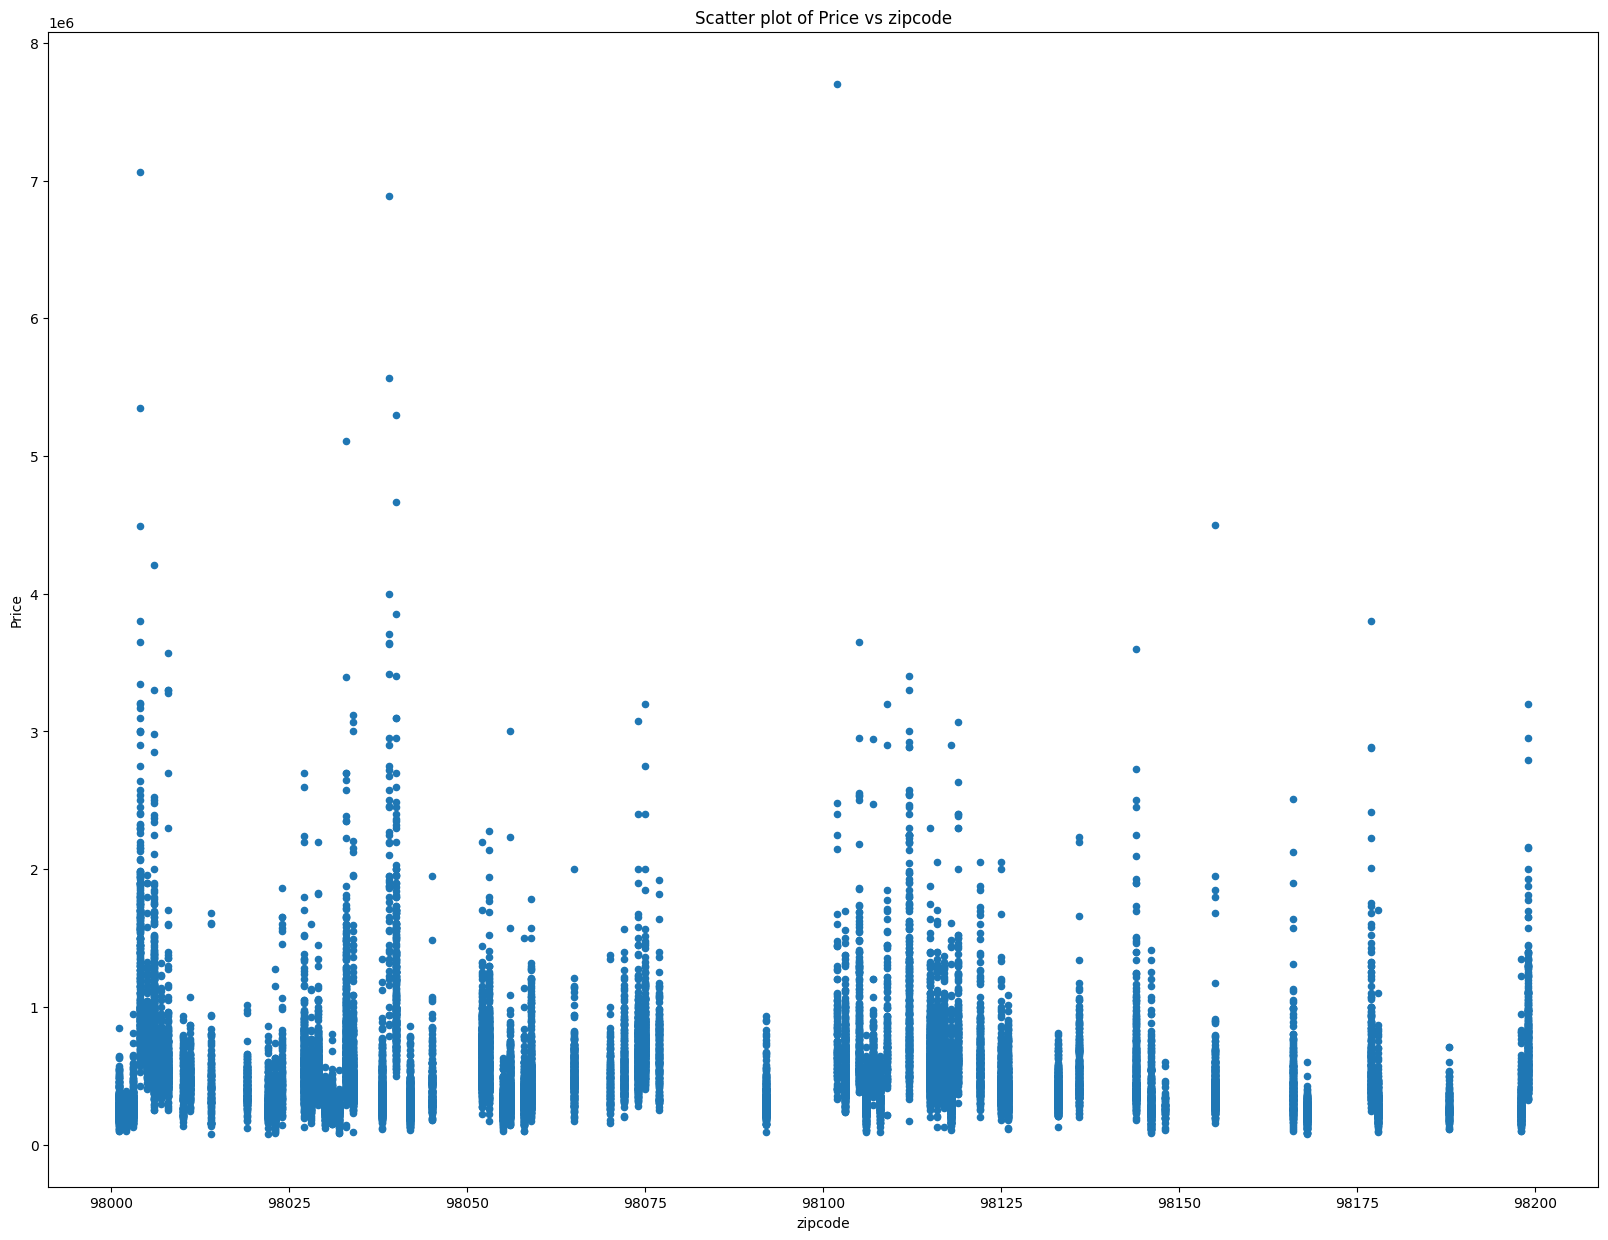

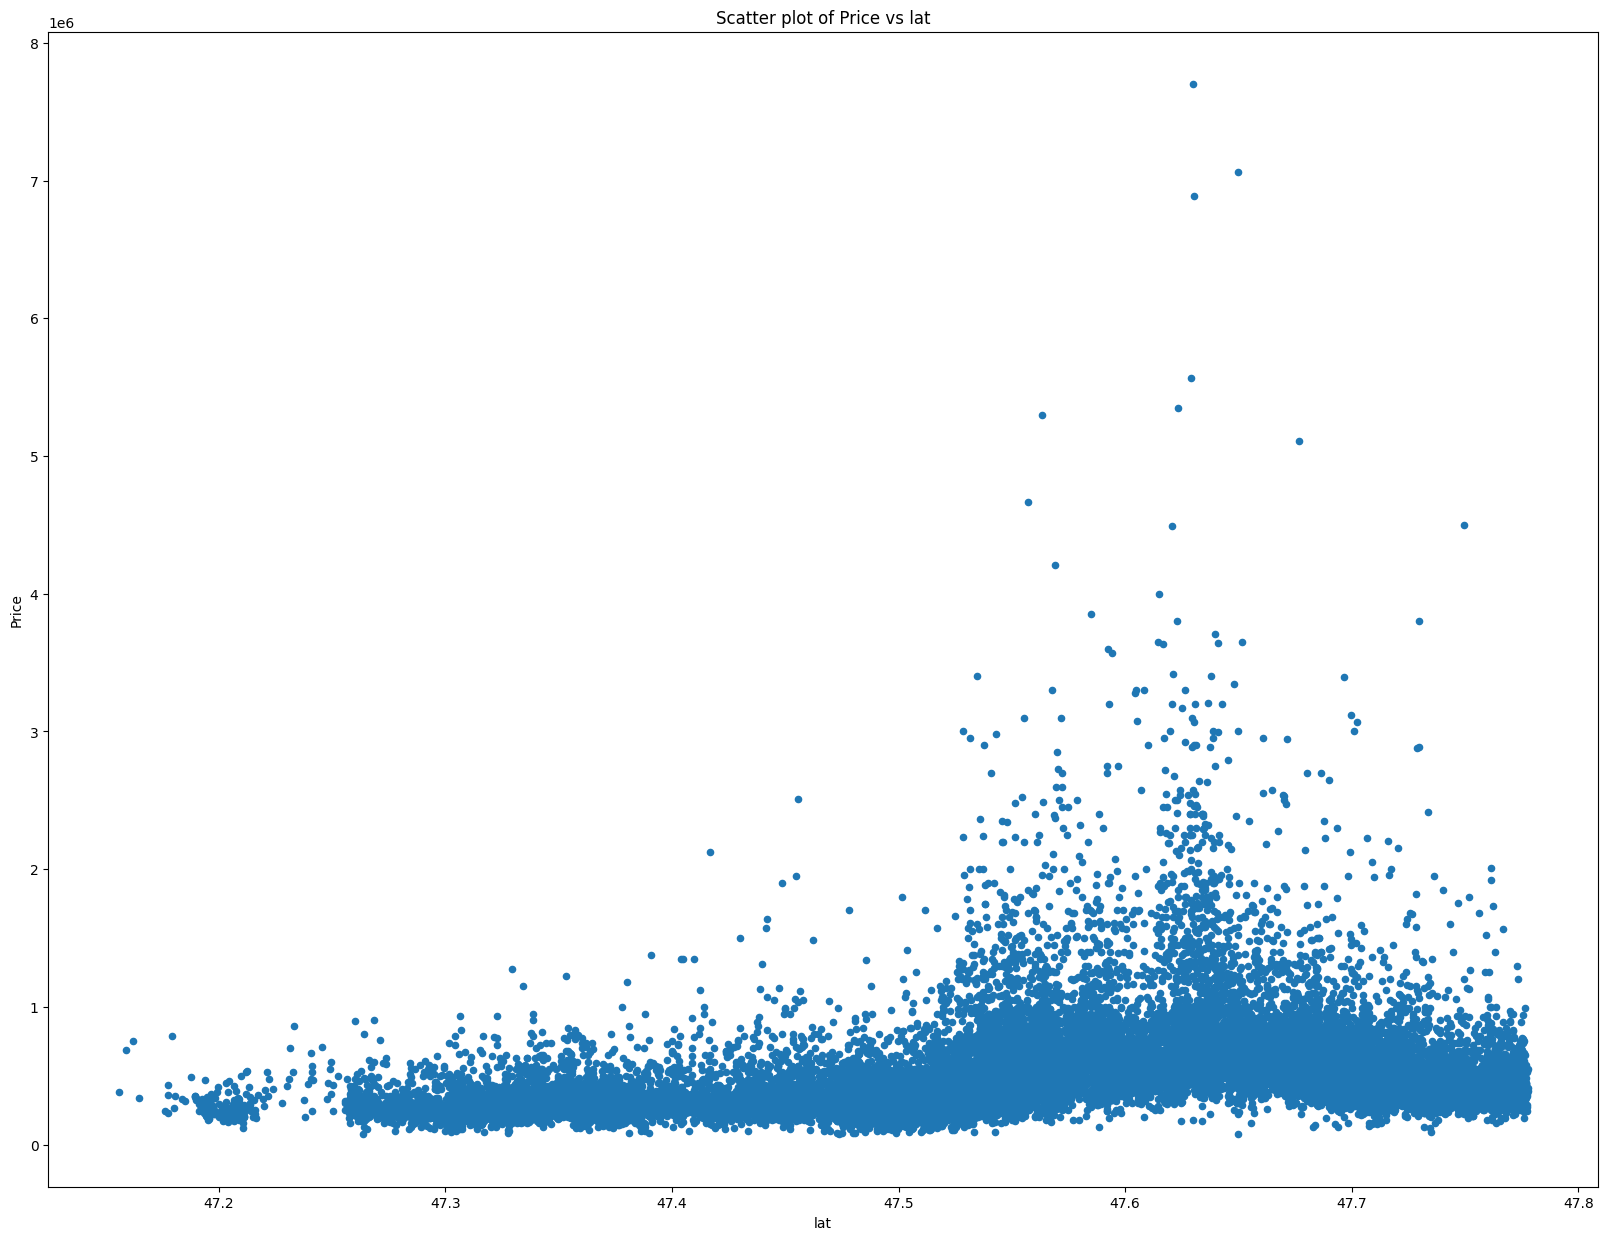

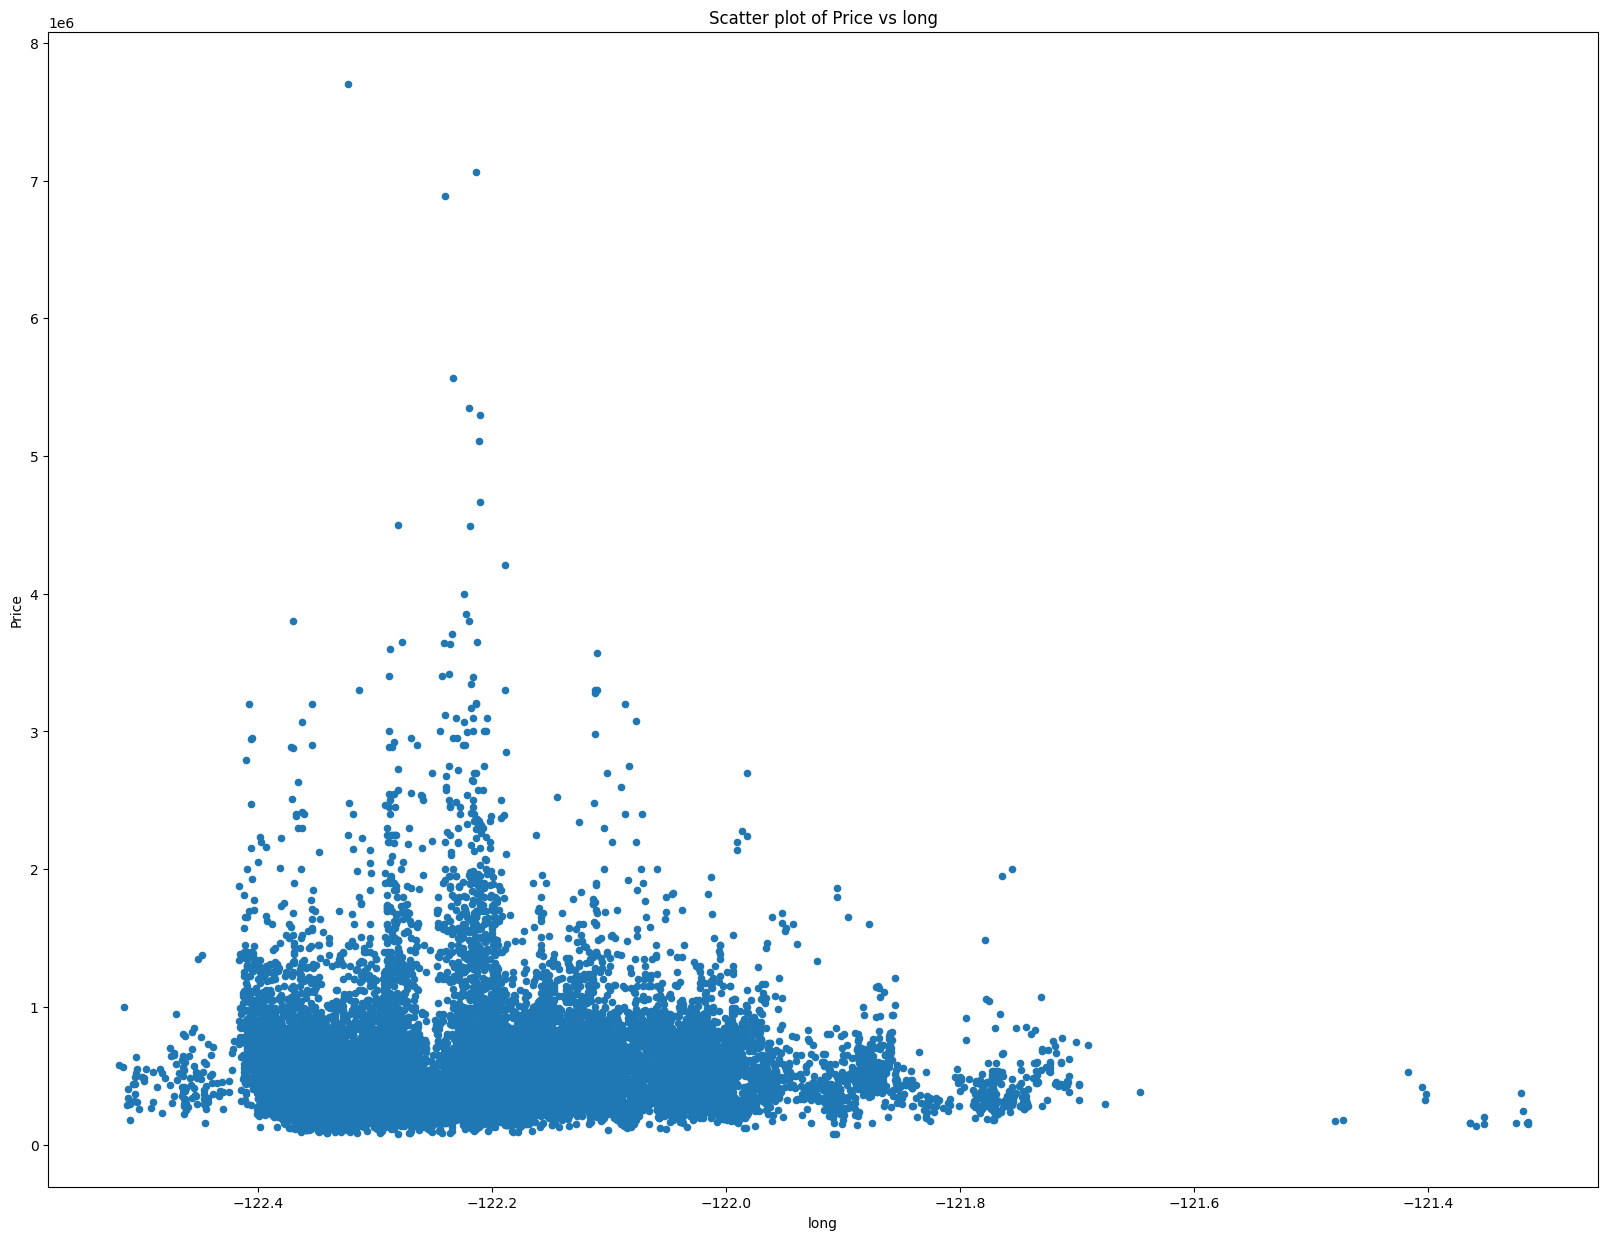

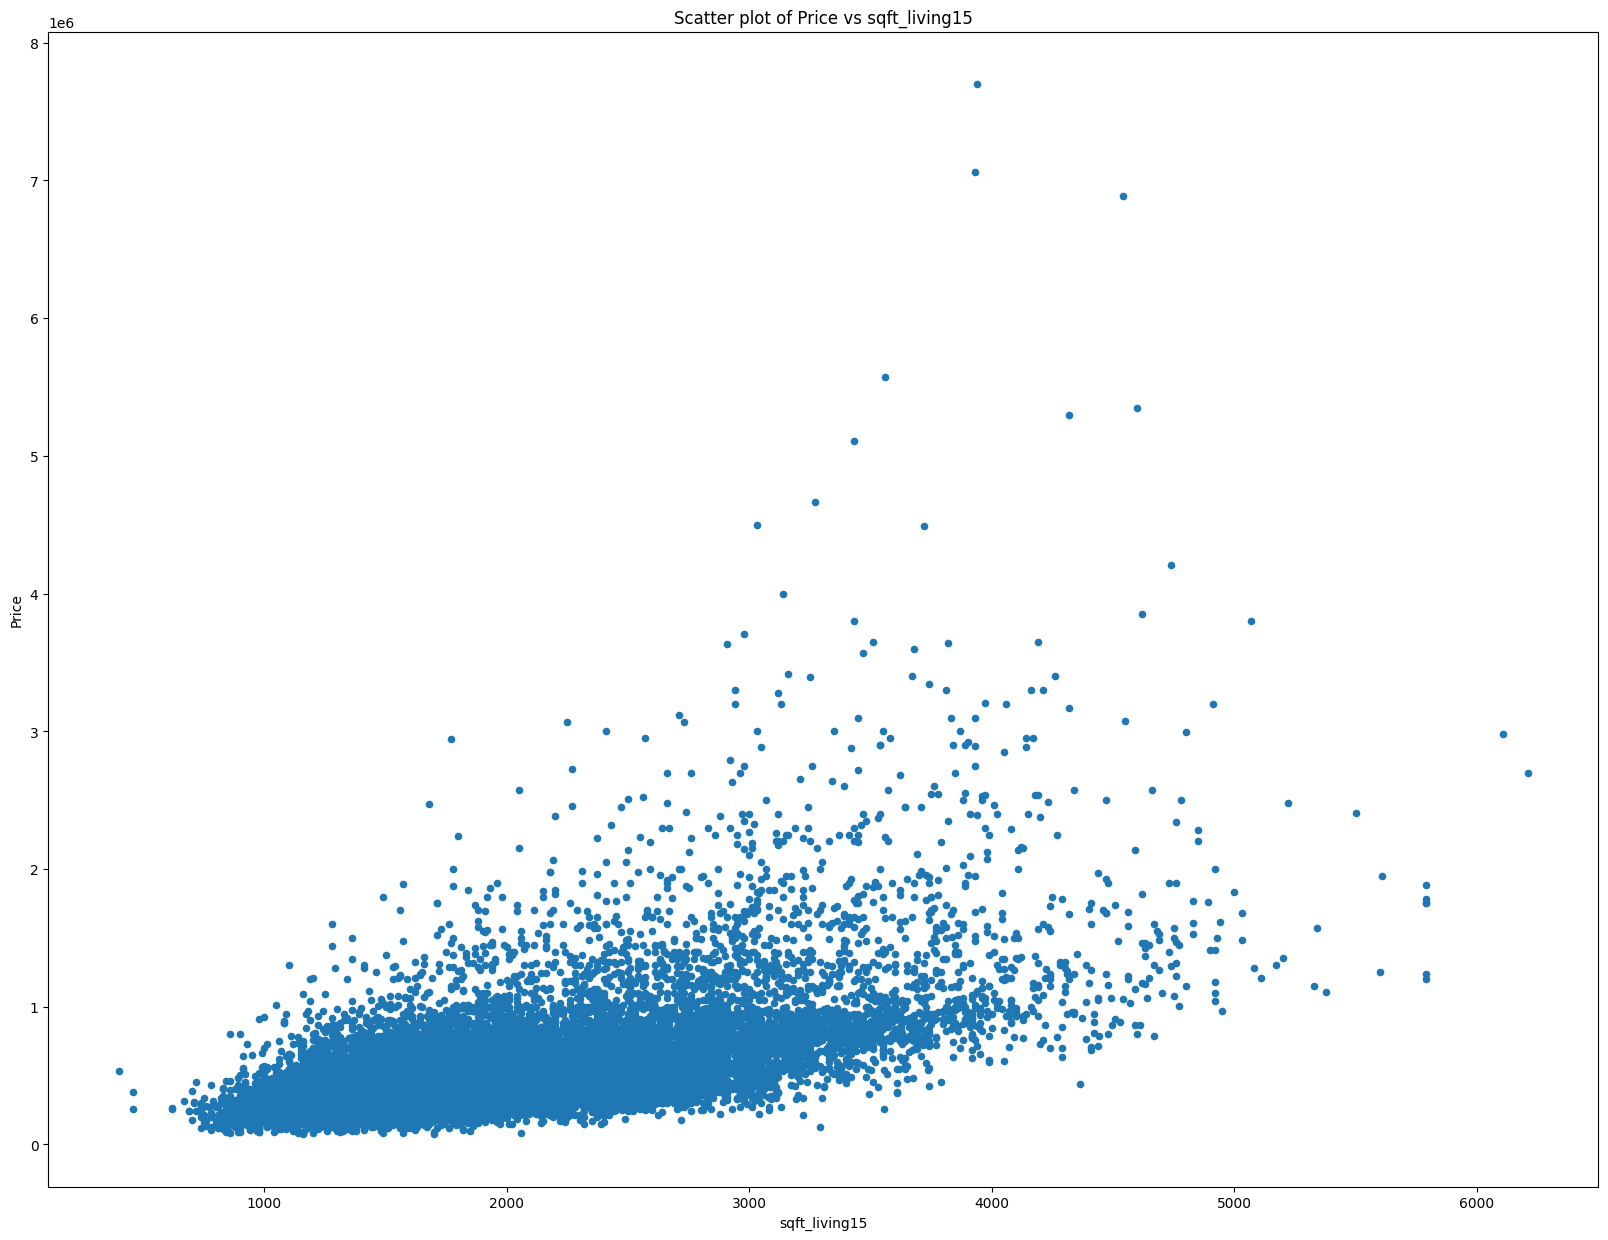

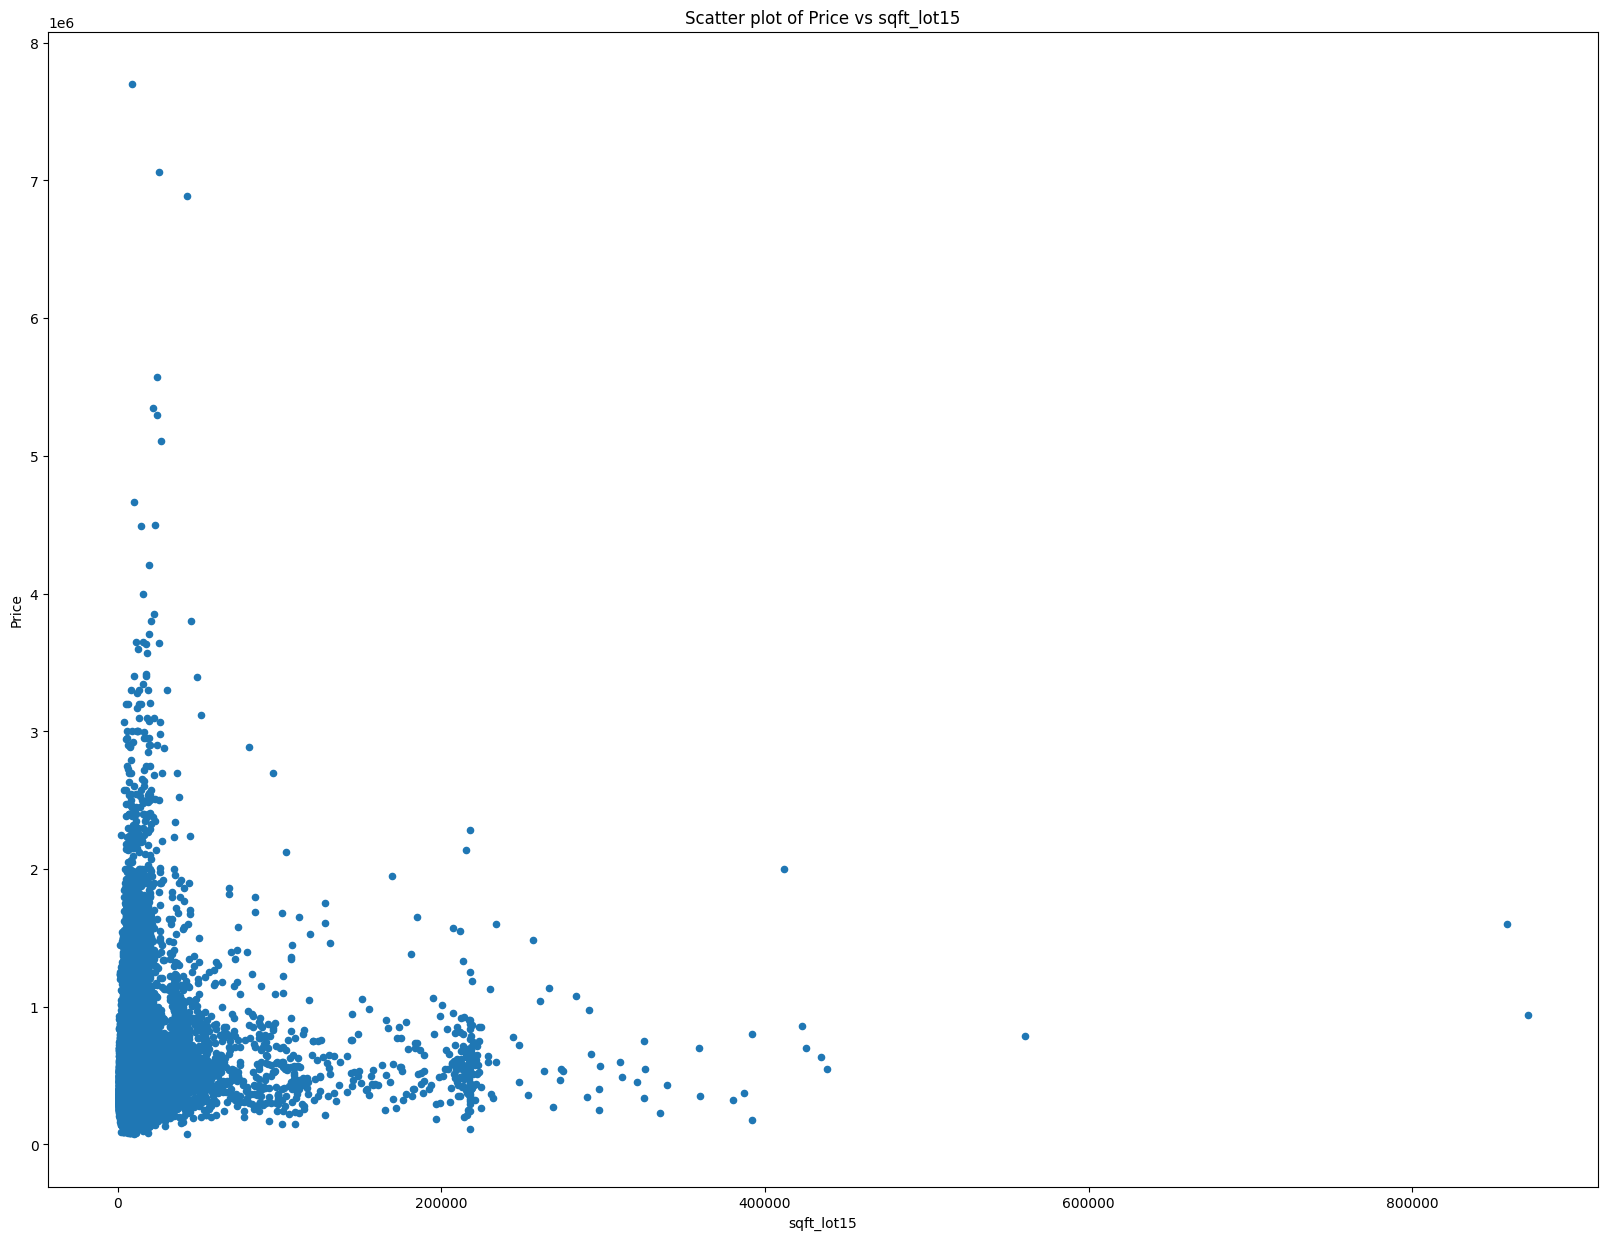

In [41]:
for column in df.columns:
    if column != 'price':
        df.plot.scatter(x=column, y='price', figsize=(20, 15))
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title(f'Scatter plot of Price vs {column}')
        plt.show()

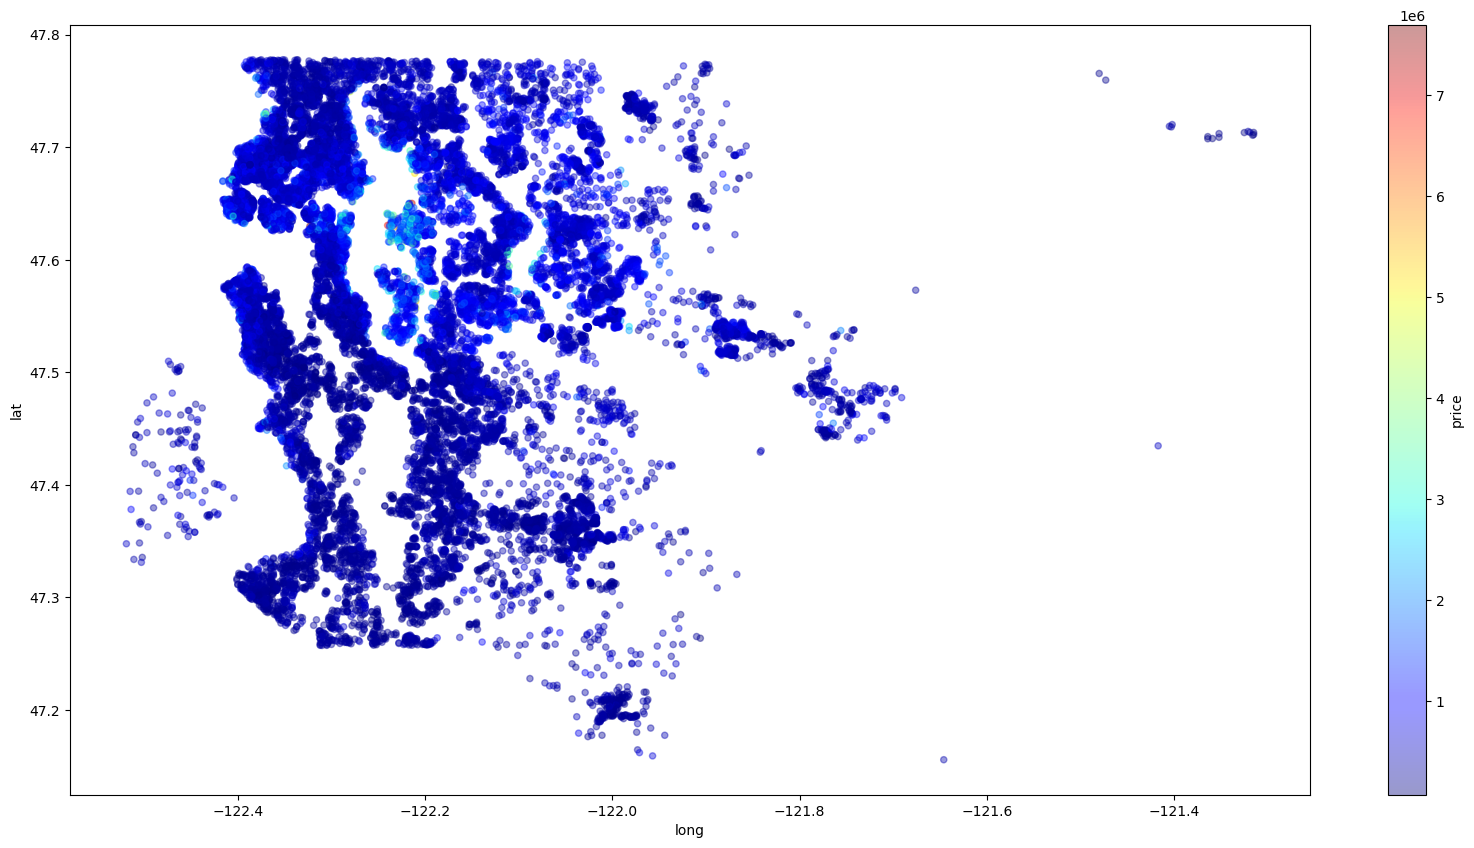

In [50]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(20,10), c="price", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

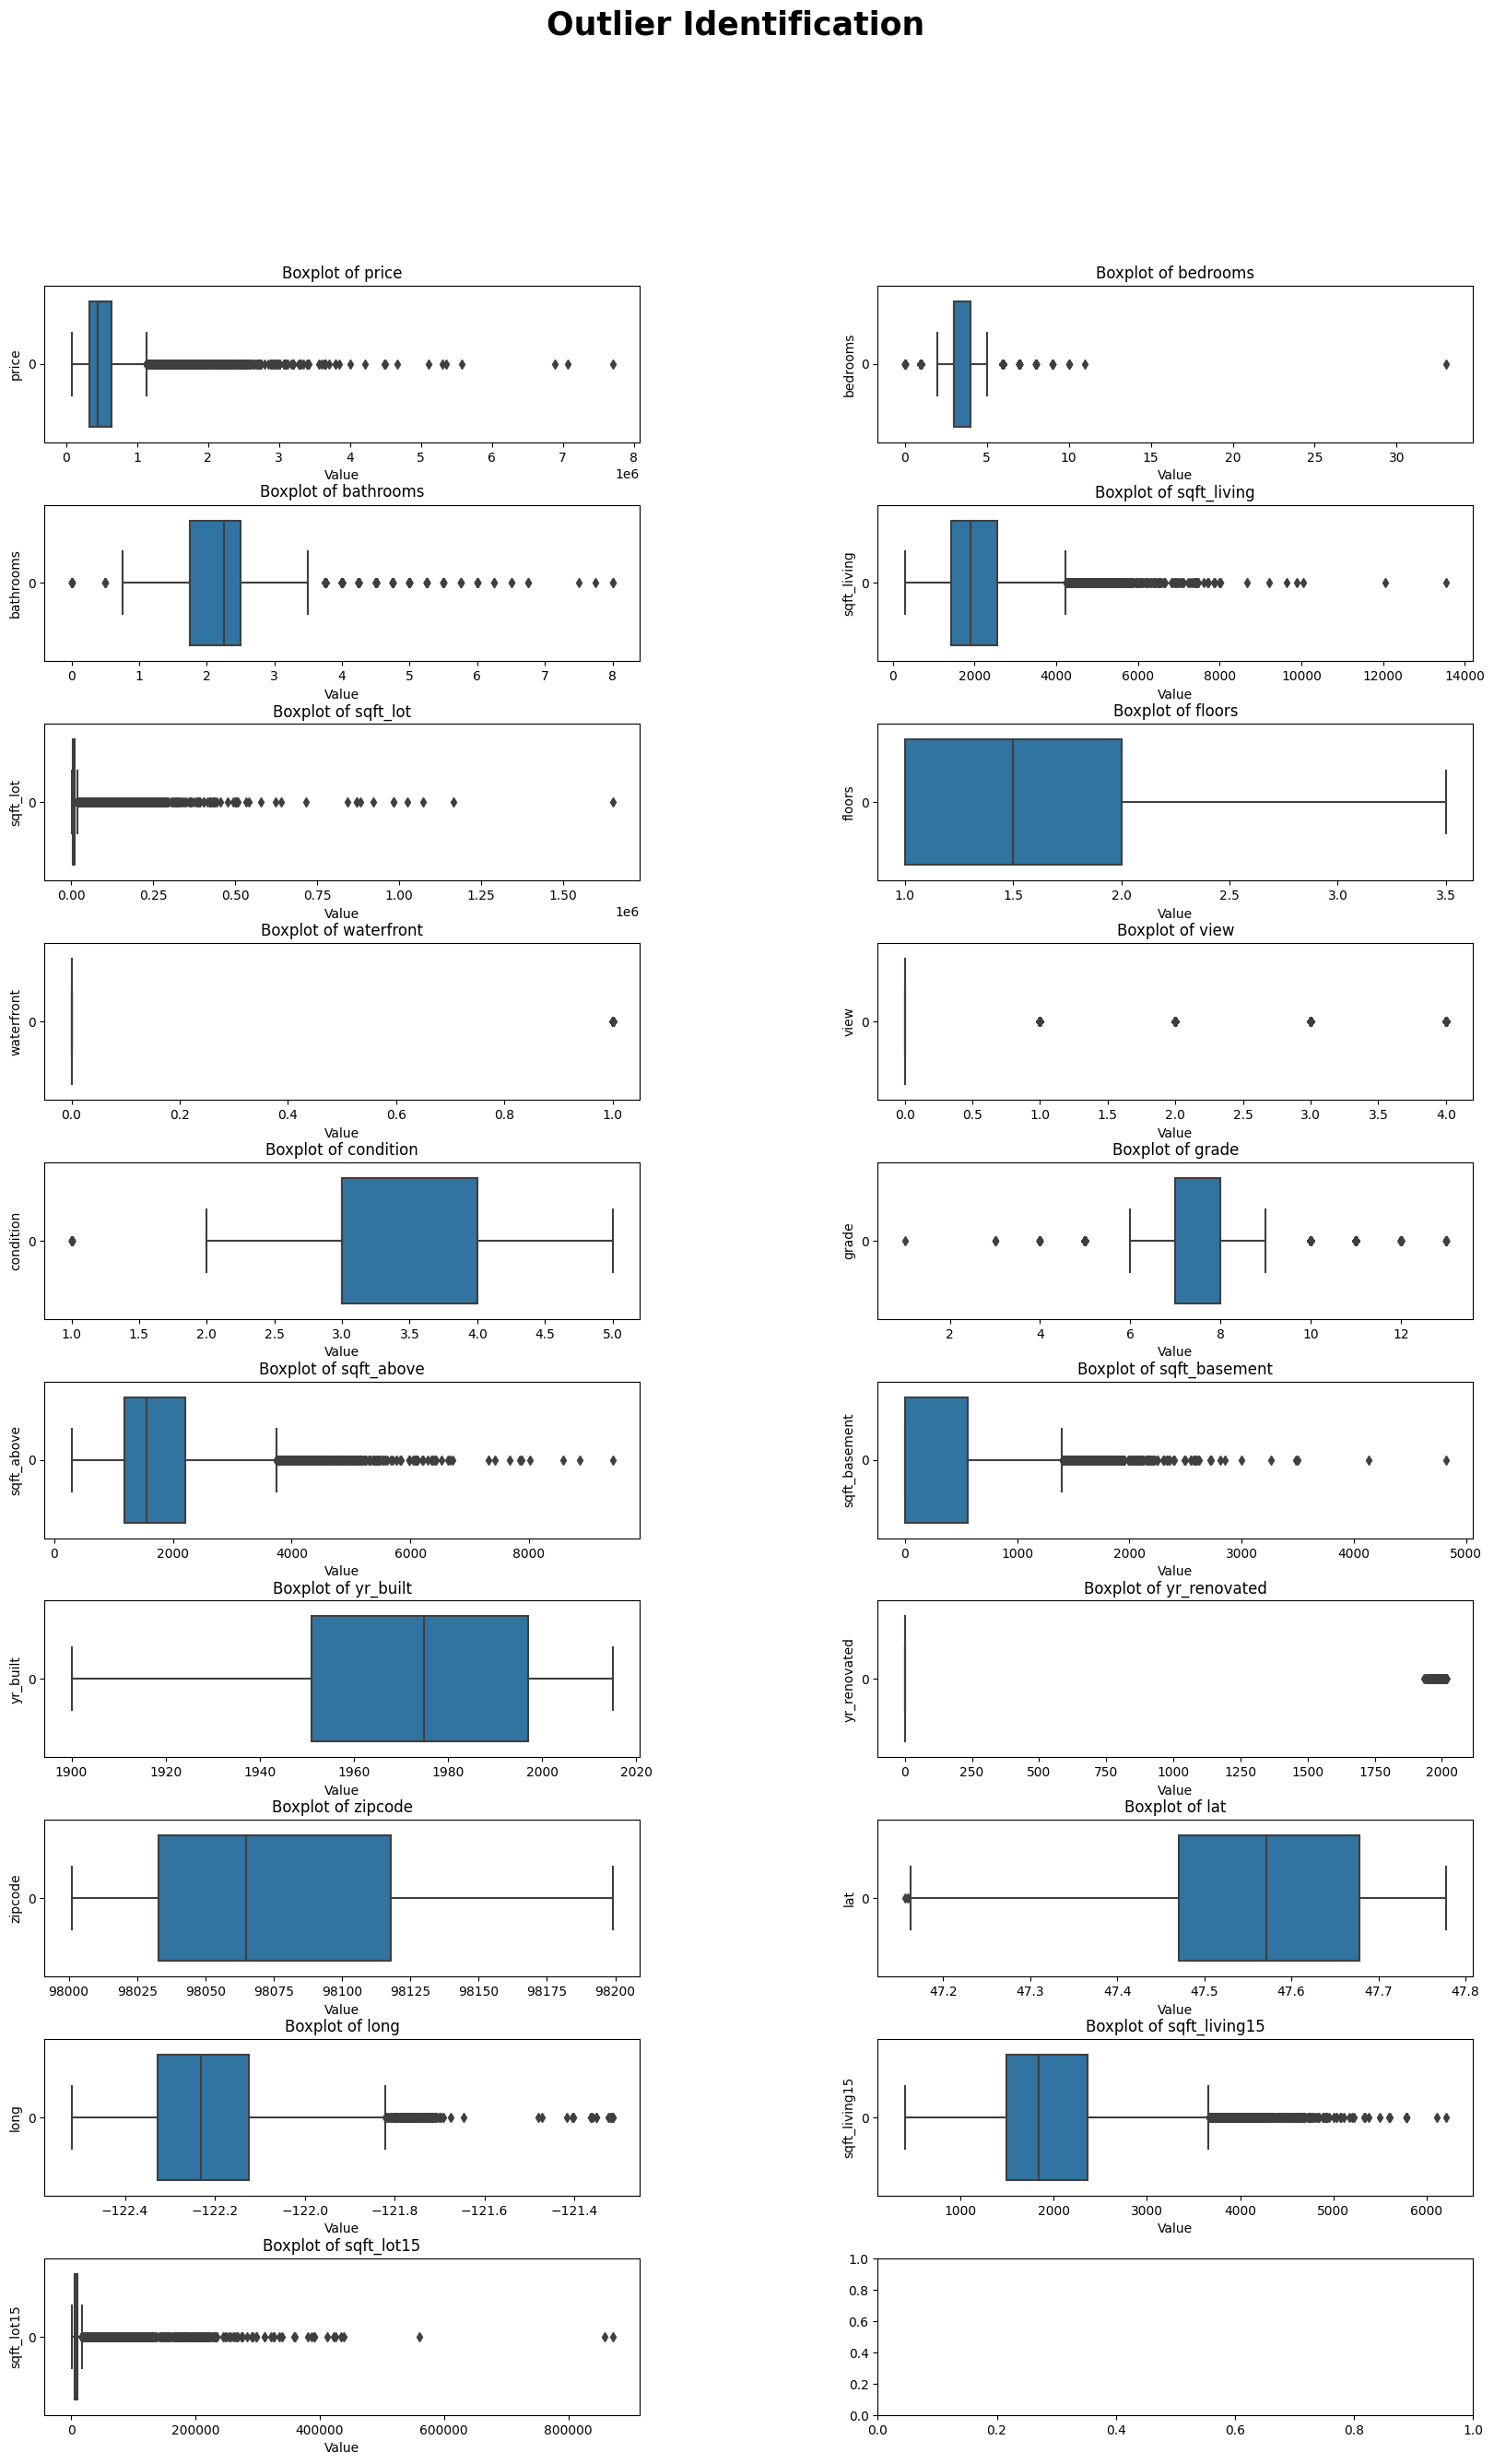

In [44]:
attributes = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']

fig, axs = plt.subplots(10, 2, figsize = (20, 30))
fig.suptitle("Outlier Identification", fontsize = 25, fontweight = 'bold')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, ax in enumerate(axs.flat):
    if(i >= 19): 
        continue
    sns.boxplot(data=df[attributes[i]], orient='h', ax=ax)
    ax.set_title(f'Boxplot of {attributes[i]}')  
    ax.set_xlabel('Value')
    ax.set_ylabel(attributes[i])
    
plt.show()

1. It looks like most of the features have data points out of whiskers which can be considered as potential outliers.
2. Since all data points outside whiskers looks meaningful we will use transformations to scale them.

## Transformations and Feature Scaling

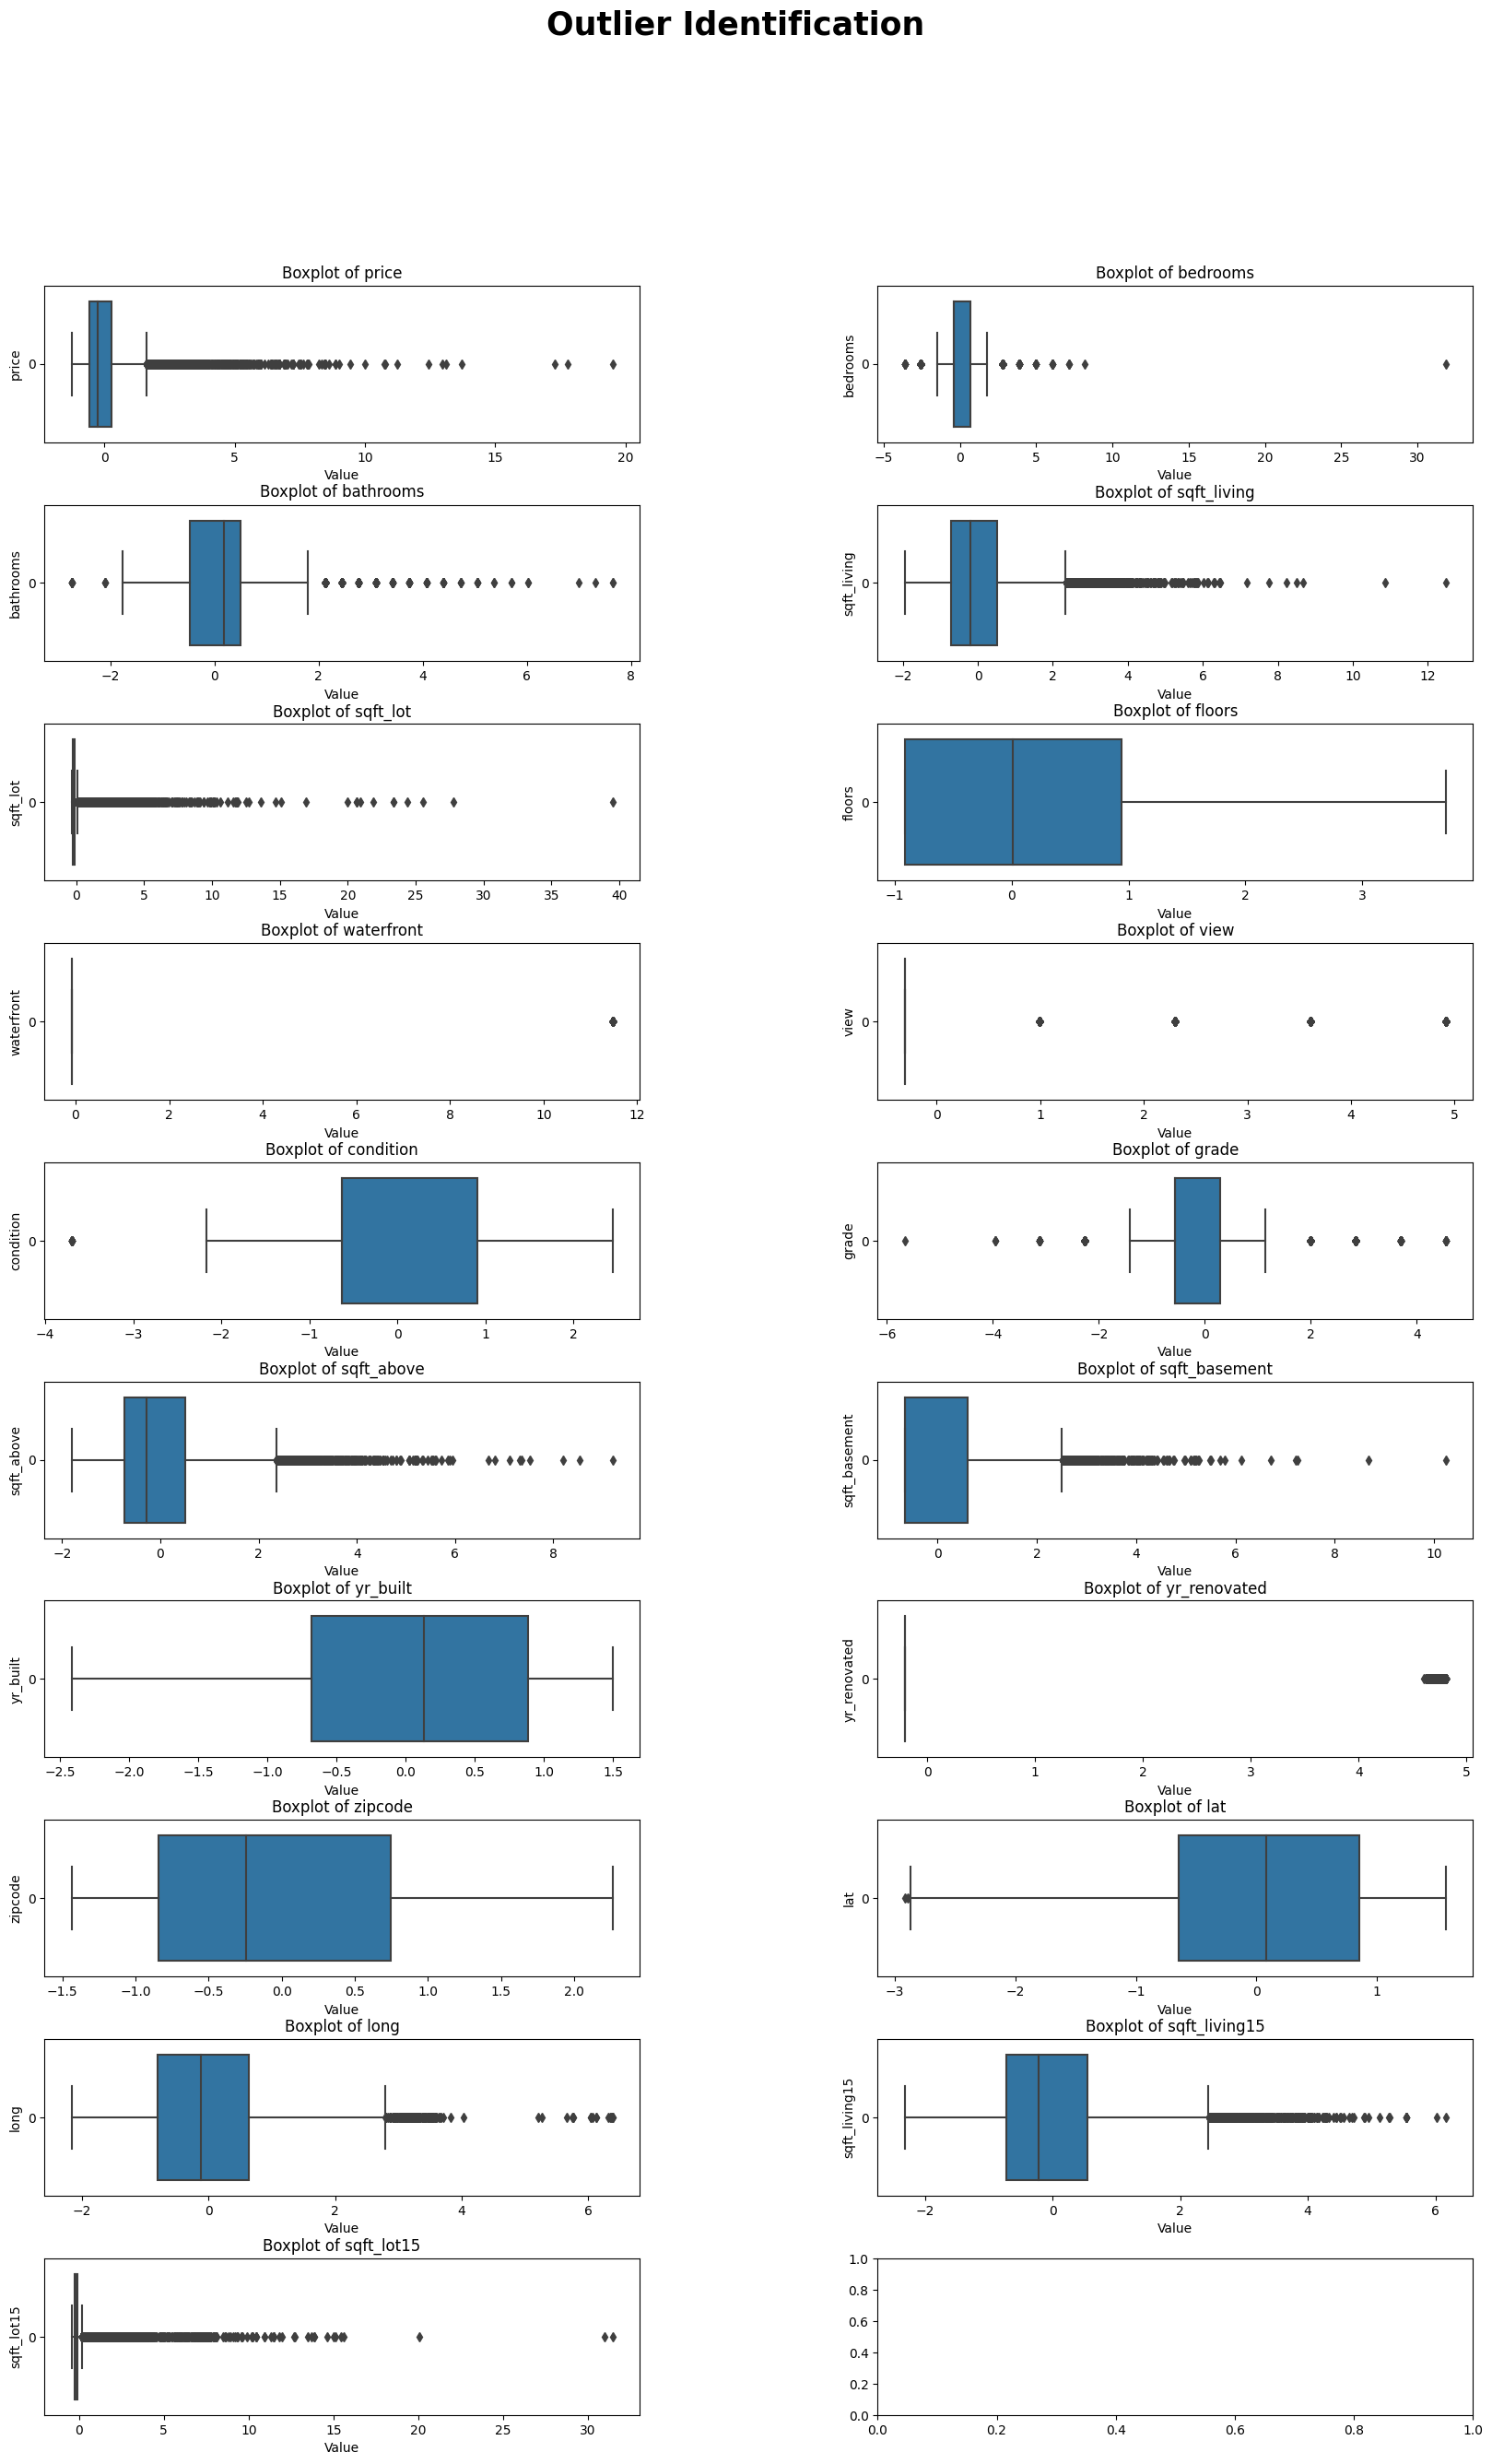

In [45]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_df = scalar.fit_transform(df[attributes])
scaled_df = pd.DataFrame(scaled_df, columns = attributes)

fig, axs = plt.subplots(10, 2, figsize = (20, 30))
fig.suptitle("Outlier Identification", fontsize = 25, fontweight = 'bold')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, ax in enumerate(axs.flat):
    if(i >= 19): 
        continue
    sns.boxplot(data=scaled_df[attributes[i]], orient='h', ax=ax)
    ax.set_title(f'Boxplot of {attributes[i]}')  
    ax.set_xlabel('Value')
    ax.set_ylabel(attributes[i])
    
plt.show()

In [46]:
corr_mat = df[attributes].corr()
corr_mat['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [47]:
corr_mat = scaled_df[attributes].corr()
corr_mat['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

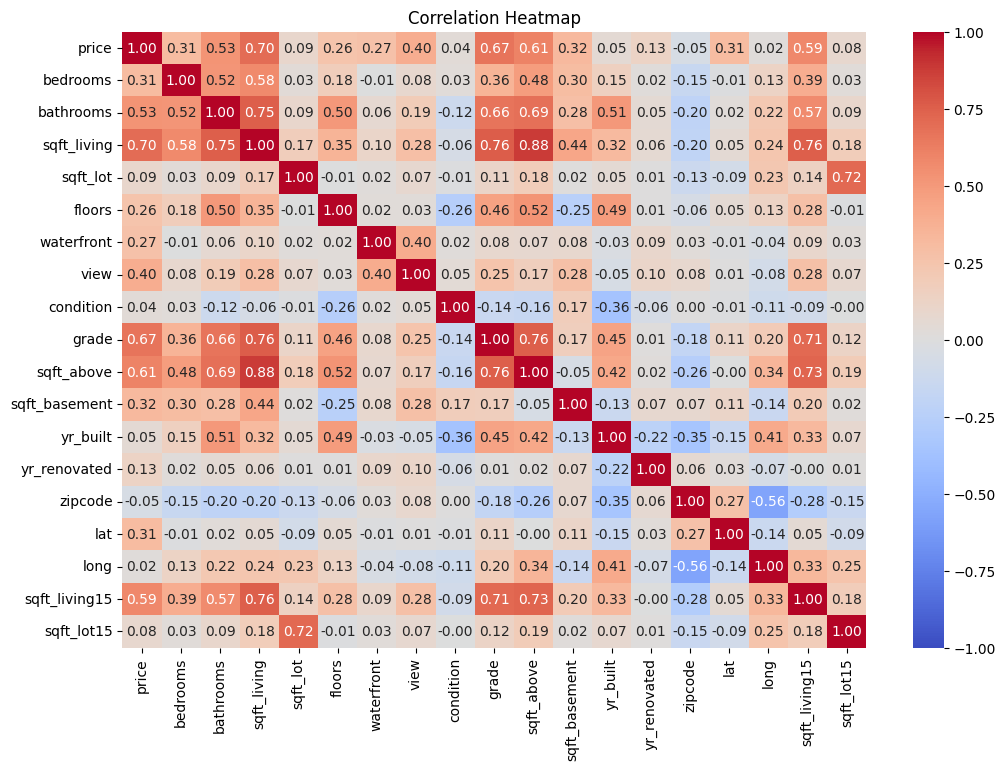

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Model Training and Testing

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [69]:
X = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']
Y = 'price'

X_train, X_test, y_train, y_test = train_test_split(df[X], df[Y], test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
lr_predictions = linear_regression_model.predict(X_train)

model_train_score = linear_regression_model.score(X_train, y_train)
lr_mse = mean_squared_error(y_train, lr_predictions)

print("Training Score: ", model_train_score)
print("MSE Training Score: ", lr_mse)
print("RMSE Training Score: ", np.sqrt(lr_mse))

Training Score:  0.6991021854487475
MSE Training Score:  39311882352.23272
RMSE Training Score:  198272.24302012805


In [70]:
X = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']
Y = 'price'

X_train, X_test, y_train, y_test = train_test_split(scaled_df[X], scaled_df[Y], test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
lr_predictions = linear_regression_model.predict(X_train)

model_train_score = linear_regression_model.score(X_train, y_train)
lr_mse = mean_squared_error(y_train, lr_predictions)

print("Training Score: ", model_train_score)
print("MSE Training Score: ", lr_mse)
print("RMSE Training Score: ", np.sqrt(lr_mse))

Training Score:  0.6990975309656408
MSE Training Score:  0.29168731056422204
RMSE Training Score:  0.5400808370644361


1. For both the models the training and testing scores are same but the mean square error is almost zeros which is promising.

## Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_regression_model, X_train, y_train, scoring="neg_mean_squared_error", cv=30)
lin_rmse_scores = np.sqrt(-scores)
print(f"Scores: {lin_rmse_scores}")
print(f"Mean Scores: {lin_rmse_scores.mean()}")
print(f"STD Scores: {lin_rmse_scores.std()}")

Scores: [0.4408178  0.61462636 0.47718242 0.65900247 0.67139509 0.69454786
 0.51762805 0.51937248 0.4928516  0.51842338 0.80885258 0.44026718
 0.51538427 0.47093162 0.44772524 0.50023499 0.55780309 0.65286076
 0.48455865 0.52595961 0.51526038 0.53430264 0.53228232 0.46725602
 0.50925891 0.51818394 0.4620832  0.51485525 0.51587964 0.48606555]
Mean Scores: 0.5355284447383449
STD Scores: 0.08352942153754418


## Desision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train, y_train)
tree_predictions = dtree_model.predict(X_train)

model_train_score = dtree_model.score(X_train, y_train)
tree_mse = mean_squared_error(y_train, tree_predictions)

print("Training Score: ", model_train_score)
print("MSE Training Score: ", tree_mse)
print("RMSE Training Score: ", np.sqrt(tree_mse))

Training Score:  0.9992357508194403
MSE Training Score:  0.0007408439977039088
RMSE Training Score:  0.027218449583029318


In [66]:
scores = cross_val_score(dtree_model, X_train, y_train, scoring="neg_mean_squared_error", cv=30)
dtree_rmse_scores = np.sqrt(-scores)
print(f"Scores: {dtree_rmse_scores}")
print(f"Mean Scores: {dtree_rmse_scores.mean()}")
print(f"STD Scores: {dtree_rmse_scores.std()}")

Scores: [0.40785007 0.61875391 0.44876505 0.53961596 0.56361382 0.57008
 0.46251765 0.44062805 0.45446721 0.4537317  0.44551469 0.47414063
 0.51758754 0.44631397 0.39729807 0.45096594 0.4896538  0.54578229
 0.4345541  0.49066329 0.45692565 0.50312262 0.50731778 0.43395064
 0.54768129 0.41417473 0.44623055 0.44244381 0.43388578 0.530289  ]
Mean Scores: 0.4789506530069429
STD Scores: 0.05334339793295121


1. Decision tree regressor is performing better than linear regression model.

## Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
rtree_predictions = dtree_model.predict(X_train)

rmodel_train_score = dtree_model.score(X_train, y_train)
rtree_mse = mean_squared_error(y_train, rtree_predictions)

print("Training Score: ", rmodel_train_score)
print("MSE Training Score: ", rtree_mse)
print("RMSE Training Score: ", np.sqrt(rtree_mse))

Training Score:  0.9992357508194403
MSE Training Score:  0.0007408439977039088
RMSE Training Score:  0.027218449583029318


In [75]:
scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=30)
rtree_rmse_scores = np.sqrt(-scores)
print(f"Scores: {rtree_rmse_scores}")
print(f"Mean Scores: {rtree_rmse_scores.mean()}")
print(f"STD Scores: {rtree_rmse_scores.std()}")

Scores: [0.29199011 0.42072251 0.31693615 0.44673993 0.42732201 0.38583715
 0.33408696 0.3089938  0.32197812 0.31635092 0.45325346 0.33796812
 0.37452306 0.31403686 0.28237128 0.31945771 0.35724543 0.40448192
 0.30370499 0.30917575 0.34020158 0.33554398 0.35623781 0.28640666
 0.3939328  0.32814868 0.30425784 0.33366455 0.33041646 0.32587329]
Mean Scores: 0.34539532900122455
STD Scores: 0.04635228597994645


1. Random Forest is much better than previous two models